In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from random import sample, seed
import copy
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=73, Om0=0.25)
import matplotlib.patheffects as PathEffects

In [3]:
from __future__ import print_function
from os.path import dirname, abspath, join as pjoin
import Corrfunc
from Corrfunc.theory.xi import xi
import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [4]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
matplotlib.rcParams.update({'errorbar.capsize': 2})
matplotlib.rcParams.update({'font.size': 12})
plt.rcParams['text.usetex'] = True
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

In [5]:
Hubble_h = 0.73
#BoxSize = ((62.5**3) * (8/8))**(1/3)
BoxSize = ((500**3) * (512/512))**(1/3)
#BoxSize = ((1000**3) * (1000/1000))**(1/3)
#BoxSize = ((250**3) * (1/125))**(1/3)
#print(BoxSize)
dilute = 5000
ssfr_MW = np.log10(2.71e-11)
sSFRcut = -11.0 # Divide quiescent from star forming galaxies 

In [6]:
directory = '../../output/test-bulge3/'
#directory = '../src/auxdata/trees/play2/'
#directory1 = '../../output/no-destruct/'
filename = 'model'
#redshift = [127.000, 79.998, 50.000, 30.000, 19.916, 18.244, 16.725, 15.343, 14.086, 12.941, 11.897, 10.944, 10.073, 9.278, 8.550, 7.883, 7.272, 6.712, 6.197, 5.724, 5.289, 4.888, 4.520, 4.179, 3.866, 3.576, 3.308, 3.060, 2.831, 2.619, 2.422, 2.239, 2.070, 1.913, 1.766, 1.630, 1.504, 1.386, 1.276, 1.173, 1.078, 0.989, 0.905, 0.828, 0.755, 0.687, 0.624, 0.564, 0.509, 0.457, 0.408, 0.362, 0.320, 0.280, 0.242, 0.208, 0.175, 0.144, 0.116, 0.089, 0.064, 0.041, 0.020, 0.000]
#redshift.reverse()
#age_list = cosmo.age(redshift).value
#lbtime = cosmo.lookback_time(redshift).value
redshift = [0.000, 1.386, 2.070, 3.060, 4.179, 5.289, 6.197, 7.272] #millennium 
#redshift = [0.024, 1.309, 2.051, 3.033, 4.088, 5.127, 6.044, 7.098] #genesis
#redshift = [0.000, 1.379, 2.028, 3.060, 4.043, 5.161, 6.231, 7.313] #bolshoi
#redshift = [0.000]
#redshift = [0.000, 1.321, 2.028, 3.037, 4.038, 5.150, 6.022, 7.026] #MDPL
firstfile = 0
lastfile = 511
MaxTreeFiles = lastfile - firstfile + 1
#print(lbtime)

In [7]:
def galdtype():
	# Define the data-type for the public version of SAGE
	Galdesc_full = [
        ('SnapNum'                      , np.int32),
        ('Type'                         , np.int32),
        ('GalaxyIndex'                  , np.int64),
        ('CentralGalaxyIndex'           , np.int64),
        ('SAGEHaloIndex'                , np.int32),
        ('SAGETreeIndex'                , np.int32),
        ('SimulationHaloIndex'          , np.int64),
        ('mergeType'                    , np.int32),
        ('mergeIntoID'                  , np.int32),
        ('mergeIntoSnapNum'             , np.int32),
        ('dT'                           , np.float32),
        ('Pos'                          , (np.float32, 3)),
        ('Vel'                          , (np.float32, 3)),
        ('Spin'                         , (np.float32, 3)),
        ('Len'                          , np.int32),
        ('Mvir'                         , np.float32),
        ('CentralMvir'                  , np.float32),
        ('Rvir'                         , np.float32),
        ('Vvir'                         , np.float32),
        ('Vmax'                         , np.float32),
        ('VelDisp'                      , np.float32),
        ('ColdGas'                      , np.float32),
        ('f_H2'                         , np.float32),
        ('f_HI'                         , np.float32),
        ('cf'                           , np.float32),
        ('Zp'                           , np.float32),
        ('Pressure'                     , np.float32),
        ('StellarMass'                  , np.float32),
        ('BulgeMass'                    , np.float32),
        ('BulgeInstability'             , np.float32),
        ('HotGas'                       , np.float32),
        ('EjectedMass'                  , np.float32),
        ('BlackHoleMass'                , np.float32),
        ('IntraClusterStars'            , np.float32),
        ('MetalsColdGas'                , np.float32),
        ('MetalsStellarMass'            , np.float32),
        ('MetalsBulgeMass'              , np.float32),
        ('MetalsHotGas'                 , np.float32),
        ('MetalsEjectedMass'            , np.float32),
        ('MetalsIntraClusterStars'      , np.float32),
        ('ColdDust'                     , np.float32),
        ('HotDust'                      , np.float32),
        ('EjectedDust'                     , np.float32),
        ('SfrDisk'                      , np.float32),
        ('SfrBulge'                     , np.float32),
        ('SfrDiskZ'                     , np.float32),
        ('SfrBulgeZ'                    , np.float32),
        ('dustdotform'                  , np.float32),
        ('dustdotgrowth'                    , np.float32),
        ('dustdotdestruct'                    , np.float32),
#        ('Sfr'                          , (np.float32, 64)),
        ('DiskRadius'                   , np.float32),
        ('Cooling'                      , np.float32),
        ('Heating'                      , np.float32),
        ('QuasarModeBHaccretionMass'    , np.float32),
        ('TimeOfLastMajorMerger'         , np.float32),
        ('TimeOfLastMinorMerger'         , np.float32),
        ('OutflowRate'                  , np.float32),
        ('infallMvir'                   , np.float32),
        ('infallVvir'                   , np.float32),
        ('infallVmax'                   , np.float32)
        ]
	names = [Galdesc_full[i][0] for i in range(len(Galdesc_full))]
	formats = [Galdesc_full[i][1] for i in range(len(Galdesc_full))]
	Galdesc = np.dtype({'names':names, 'formats':formats}, align=True)
	return Galdesc

In [8]:
def read_one_file(name, Galdesc):
    fin = open(name, 'rb')
    Ntrees = np.fromfile(fin,np.dtype(np.int32),1)[0]
    NtotGals = np.fromfile(fin,np.dtype(np.int32),1)[0]
    GalsPerTree = np.fromfile(fin, np.dtype((np.int32, Ntrees)),1)[0]
    G = np.fromfile(fin, Galdesc, NtotGals)
    G = G.view(recarray)
    return G

In [9]:
Galdesc = galdtype()

G_history = [0]*len(redshift)
#G_history1 = [0]*len(redshift)
for i in range(len(redshift)):
    G_snap = []
#    G_snap1 = []
#    G_snap2 = []
    GalsTree = []
    
    for k in range(firstfile, lastfile+1):
        
        name = (directory+filename+'_z'+f'{redshift[i]:.3f}'+'_'+f'{k}')
        G = read_one_file(name, Galdesc)
        G_snap.extend(G)
        '''
        name1 = (directory1+filename+'_z'+f'{redshift[i]:.3f}'+'_'+f'{k}')
        G1 = read_one_file(name1, Galdesc)
        G_snap1.extend(G)
        '''
    G_snap = np.array(G_snap)
    G_snap = G_snap.view(recarray)
    
    #G_snap1 = np.array(G_snap1)
    #G_snap1 = G_snap1.view(recarray)
    
    G_history[i] = G_snap
    #G_history1[i] = G_snap1

## Fig 1: BTT - dust fraction

/apps/skylake/software/compiler/gcc/6.4.0/ipython/5.5.0-python-3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/apps/skylake/software/compiler/gcc/6.4.0/ipython/5.5.0-python-3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in log10
/apps/skylake/software/compiler/gcc/6.4.0/ipython/5.5.0-python-3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:116: RuntimeWarning: divide by zero encountered in log10


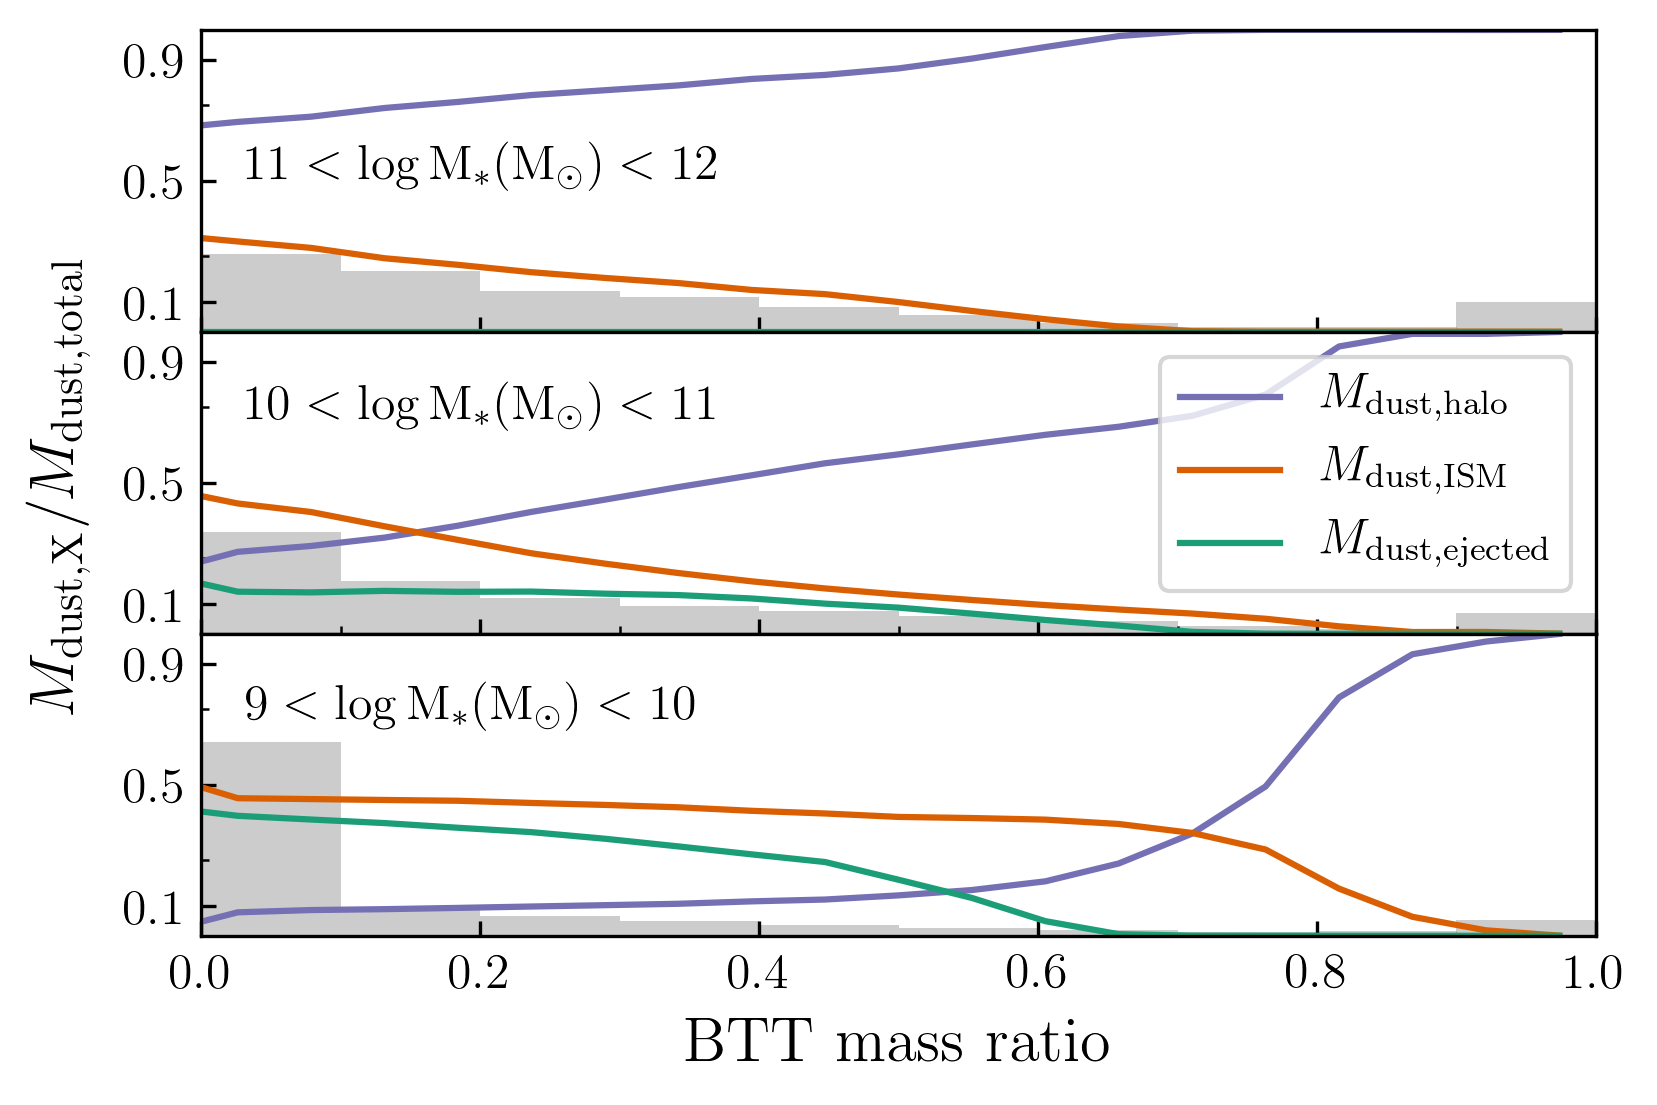

In [11]:
stellarmass = G_history[0].StellarMass * 1.e10 / Hubble_h
bulge = G_history[0].BulgeMass * 1.e10 / Hubble_h
yticks = [0.1, 0.5, 0.9]

fig, axes = plt.subplots(3, 1, sharex=True)

ax = plt.subplot(311)
ax.set_xticklabels([])

w = np.where((np.log10(stellarmass)>11) & (np.log10(stellarmass)<12) & 
             (G_history[0].ColdGas * 1.e10 / Hubble_h > 1.e8) &
            (G_history[0].MetalsColdGas > 0))[0]

btt = bulge[w] /stellarmass[w]

hot = G_history[0].HotDust[w] * 1.e10 / Hubble_h
cold = G_history[0].ColdDust[w] * 1.e10 / Hubble_h
ejected = G_history[0].EjectedDust[w] * 1.e10 / Hubble_h
total_dust = hot + cold + ejected

fhot = np.zeros(len(w))
fcold = np.zeros(len(w))
fejected = np.zeros(len(w))

w = np.where(total_dust > 0)[0]

fhot[w] = hot[w]/total_dust[w]
fcold[w] = cold[w]/total_dust[w]
fejected[w] = ejected[w]/total_dust[w]

binwidth = 0.05
total_bins = int((max(btt) - min(btt)) / binwidth)

bins = np.linspace(min(btt), max(btt), total_bins)
delta = bins[1]-bins[0]
idx = np.digitize(btt, bins)
median_hot = [np.percentile(fhot[idx==k+1], 50, interpolation='linear') for k in range(total_bins) if len(fhot[idx==k+1]) > 0]
median_cold = [np.percentile(fcold[idx==k+1], 50, interpolation='linear') for k in range(total_bins) if len(fcold[idx==k+1]) > 0]
median_ejected = [np.percentile(fejected[idx==k+1], 50, interpolation='linear') for k in range(total_bins) if len(fejected[idx==k+1]) > 0]

xh = [(bins[k]-delta/2) for k in range(total_bins) if len(fhot[idx==k+1]) > 0]
xc = [(bins[k]-delta/2) for k in range(total_bins) if len(fcold[idx==k+1]) > 0]
xe = [(bins[k]-delta/2) for k in range(total_bins) if len(fejected[idx==k+1]) > 0]

#plt.scatter(mass, form, marker='o', s=1, c='white', alpha=0.5, label='z = '+ f'{redshift[i]:.3f}')
plt.plot(xh, median_hot, '#7570b3', label=r'$M_\mathrm{dust, halo}$')
plt.plot(xc, median_cold, '#d95f02', label=r'$M_\mathrm{dust, ISM}$')
plt.plot(xe, median_ejected, '#1b9e77', label=r'$M_\mathrm{dust, ejected}$')
hist, bins = np.histogram(btt)
delta = bins[1] - bins[0]
plt.bar(bins[:-1]+0.5*delta, hist/sum(hist), width=bins[1]-bins[0], color='grey', alpha=0.4)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.yticks(yticks)
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.25))
ax.tick_params(axis='both', which='both', direction='in', labelsize=12)

#----------------------------------------------------------------------
ax1 = plt.subplot(312)
ax1.set_xticklabels([])

w = np.where((np.log10(stellarmass)>10) & (np.log10(stellarmass)<11) & 
             (G_history[0].ColdGas * 1.e10 / Hubble_h > 1.e8) &
            (G_history[0].MetalsColdGas > 0))[0]

btt = bulge[w] /stellarmass[w]

hot = G_history[0].HotDust[w] * 1.e10 / Hubble_h
cold = G_history[0].ColdDust[w] * 1.e10 / Hubble_h
ejected = G_history[0].EjectedDust[w] * 1.e10 / Hubble_h
total_dust = hot + cold + ejected

fhot = np.zeros(len(w))
fcold = np.zeros(len(w))
fejected = np.zeros(len(w))

w = np.where(total_dust > 0)[0]
fhot[w] = hot[w]/total_dust[w]
fcold[w] = cold[w]/total_dust[w]
fejected[w] = ejected[w]/total_dust[w]

binwidth = 0.05
total_bins = int((max(btt) - min(btt)) / binwidth)

bins = np.linspace(min(btt), max(btt), total_bins)
delta = bins[1]-bins[0]
idx = np.digitize(btt, bins)
median_hot = [np.percentile(fhot[idx==k+1], 50, interpolation='linear') for k in range(total_bins) if len(fhot[idx==k+1]) > 0]
median_cold = [np.percentile(fcold[idx==k+1], 50, interpolation='linear') for k in range(total_bins) if len(fcold[idx==k+1]) > 0]
median_ejected = [np.percentile(fejected[idx==k+1], 50, interpolation='linear') for k in range(total_bins) if len(fejected[idx==k+1]) > 0]

xh = [(bins[k]-delta/2) for k in range(total_bins) if len(fhot[idx==k+1]) > 0]
xc = [(bins[k]-delta/2) for k in range(total_bins) if len(fcold[idx==k+1]) > 0]
xe = [(bins[k]-delta/2) for k in range(total_bins) if len(fejected[idx==k+1]) > 0]

#plt.scatter(mass, form, marker='o', s=1, c='white', alpha=0.5, label='z = '+ f'{redshift[i]:.3f}')
plt.plot(xh, median_hot, '#7570b3', label=r'$M_\mathrm{dust, halo}$')
plt.plot(xc, median_cold, '#d95f02', label=r'$M_\mathrm{dust, ISM}$')
plt.plot(xe, median_ejected, '#1b9e77', label=r'$M_\mathrm{dust, ejected}$')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.yticks(yticks)
hist, bins = np.histogram(btt)
delta = bins[1] - bins[0]
plt.bar(bins[:-1]+0.5*delta, hist/sum(hist), width=bins[1]-bins[0], color='grey', alpha=0.4)
plt.legend(loc='upper right')
ax1.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax1.yaxis.set_minor_locator(plt.MultipleLocator(0.25))
ax1.tick_params(axis='both', which='both', direction='in', labelsize=12)

#----------------------------------------------------------------------------
ax2 = plt.subplot(313)

w = np.where((np.log10(stellarmass)>9) & (np.log10(stellarmass)<10) & 
             (G_history[0].ColdGas * 1.e10 / Hubble_h > 1.e8) &
            (G_history[0].MetalsColdGas > 0))[0]

btt = bulge[w] /stellarmass[w]

hot = G_history[0].HotDust[w] * 1.e10 / Hubble_h
cold = G_history[0].ColdDust[w] * 1.e10 / Hubble_h
ejected = G_history[0].EjectedDust[w] * 1.e10 / Hubble_h
total_dust = hot + cold + ejected

fhot = np.zeros(len(w))
fcold = np.zeros(len(w))
fejected = np.zeros(len(w))

w = np.where(total_dust > 0)[0]
fhot[w] = hot[w]/total_dust[w]
fcold[w] = cold[w]/total_dust[w]
fejected[w] = ejected[w]/total_dust[w]

binwidth = 0.05
total_bins = int((max(btt) - min(btt)) / binwidth)

bins = np.linspace(min(btt), max(btt), total_bins)
delta = bins[1]-bins[0]
idx = np.digitize(btt, bins)
median_hot = [np.percentile(fhot[idx==k+1], 50, interpolation='linear') for k in range(total_bins) if len(fhot[idx==k+1]) > 0]
median_cold = [np.percentile(fcold[idx==k+1], 50, interpolation='linear') for k in range(total_bins) if len(fcold[idx==k+1]) > 0]
median_ejected = [np.percentile(fejected[idx==k+1], 50, interpolation='linear') for k in range(total_bins) if len(fejected[idx==k+1]) > 0]

xh = [(bins[k]-delta/2) for k in range(total_bins) if len(fhot[idx==k+1]) > 0]
xc = [(bins[k]-delta/2) for k in range(total_bins) if len(fcold[idx==k+1]) > 0]
xe = [(bins[k]-delta/2) for k in range(total_bins) if len(fejected[idx==k+1]) > 0]

#plt.scatter(mass, form, marker='o', s=1, c='white', alpha=0.5, label='z = '+ f'{redshift[i]:.3f}')
plt.plot(xh, median_hot, '#7570b3', label='$M_\mathrm{dust, halo}$')
plt.plot(xc, median_cold, '#d95f02', label='$M_\mathrm{dust, ISM}$')
plt.plot(xe, median_ejected, '#1b9e77', label='$M_\mathrm{dust, ejected}$')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.yticks(yticks)
hist, bins = np.histogram(btt)
delta = bins[1] - bins[0]
plt.bar(bins[:-1]+0.5*delta, hist/sum(hist), width=bins[1]-bins[0], color='grey', alpha=0.4)

ax2.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax2.yaxis.set_minor_locator(plt.MultipleLocator(0.25))
ax2.tick_params(axis='both', which='both', direction='in', labelsize=12)

plt.xlabel(r'$\mathrm{BTT}\ \mathrm{mass}\ \mathrm{ratio}$', fontsize = 15)
fig.text(0.03, 0.5, r'$M_\mathrm{dust,X}/M_\mathrm{dust,total}$', fontsize=15, va='center', rotation='vertical')
plt.subplots_adjust(wspace=0, hspace=0)
fig.text(0.15, 0.3, r'$9 <\log \mathrm{M_*} (\mathrm{M_\odot})<10$')
fig.text(0.15, 0.55, r'$10 <\log \mathrm{M_*} (\mathrm{M_\odot})<11$')
fig.text(0.15, 0.75, r'$11 <\log \mathrm{M_*} (\mathrm{M_\odot})<12$')
plt.savefig('plots/btt-fraction-mass-512files.png')

## Fig 2: Dust mass - stellar mass

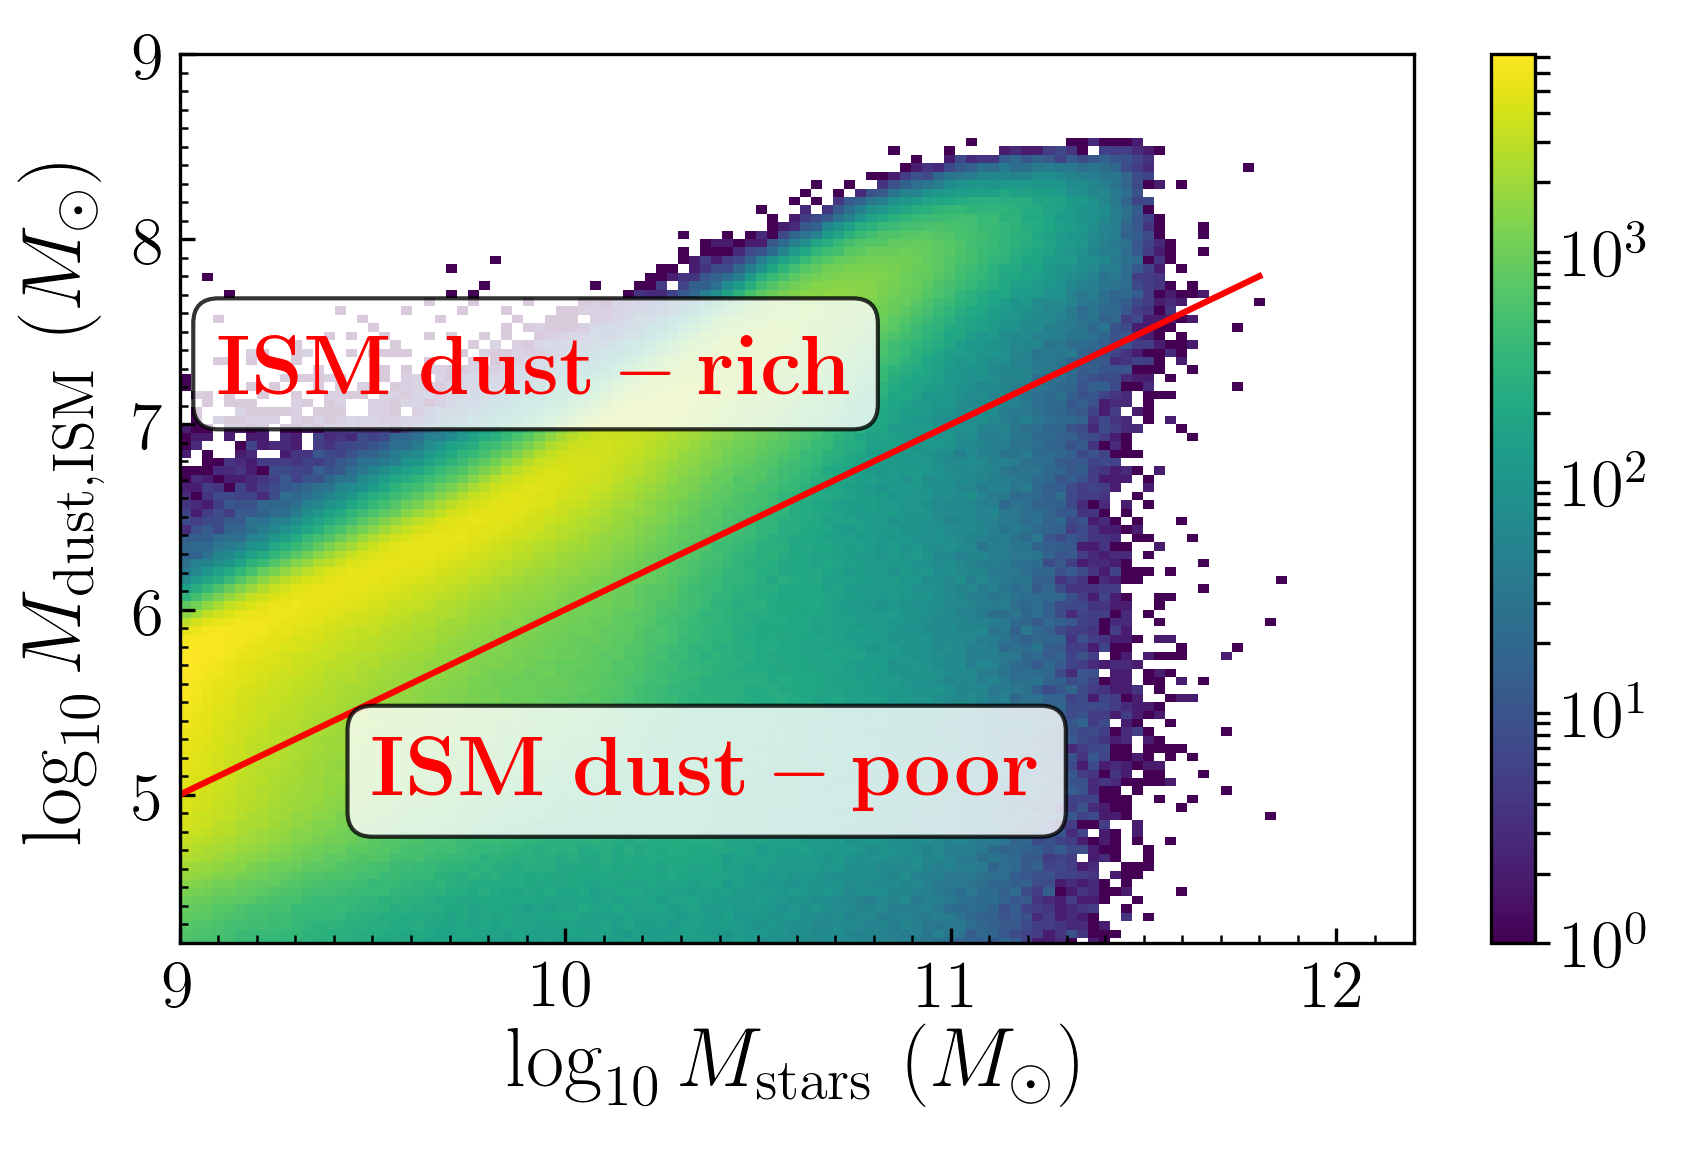

In [10]:
plt.figure()
ax1 = plt.subplot(111)

w = np.where((G_history[0].StellarMass * 1.e10 / Hubble_h > 1.e9) & (G_history[0].ColdDust * 1.e10 / Hubble_h > 1.e4))[0]
dust = np.log10(G_history[0].ColdDust[w] * 1.e10 / Hubble_h)
alldust = np.log10((G_history[0].ColdDust[w] + 
                    G_history[0].HotDust[w] + G_history[0].EjectedDust[w])* 1.e10 / Hubble_h)
mass = np.log10(G_history[0].StellarMass[w] * 1.e10 / Hubble_h)
#print(i, max(dust), max(mass), len(w))
    
binwidth = 0.3
total_bins = int((max(mass) - min(mass)) / binwidth)
bins = np.linspace(mass.min(), mass.max(), total_bins)
delta = bins[1]-bins[0]
idx = np.digitize(mass, bins)

#PLOT COLD DUST MEDIAN
#=====================
median = [np.percentile(dust[idx==k+1], 50) for k in range(total_bins) if len(dust[idx==k+1]) > 3]
x = [(bins[k]-delta/2) for k in range(total_bins) if len(dust[idx==k+1]) > 3]
h = ax1.hist2d(mass, dust, bins=100, norm=LogNorm())
plt.colorbar(h[3])
#plt.plot(x, median, 'k-', linewidth=1.2)

plt.axis([9, 12.2, 4.2, 9])
ax1.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax1.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax1.tick_params(axis='both', which='both', direction='in')

plt.yticks([5, 6, 7, 8, 9])

plt.xlabel(r'$\log_{10} M_\mathrm{stars}\ (M_{\odot})$', fontsize=20)
plt.ylabel(r'$\log_{10} M_\mathrm{dust,ISM}\ (M_{\odot})$', fontsize=20)

#plt.axvspan(np.log10(5.8e10), 11,color='pink', alpha=0.8)
#plt.axhline(y=7, color='magenta')
x = np.arange(min(mass), max(mass), 0.2)
y = x-4
plt.plot(x, y, '-', c='red')

plt.tight_layout()
#txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='pink')])
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
txt = plt.text(9.5, 5, r'$\mathbf{ISM}\ \mathbf{dust-poor}$', color='r', fontsize=20, bbox=props)

txt = plt.text(9.1, 7.2, r'$\mathbf{ISM}\ \mathbf{dust-rich}$', color='r', fontsize=20, bbox=props)


plt.savefig('plots/dust-stellarmass-512files-dtr.png')

## Fig 3: sSFR histogram

0.15989851098107039


/apps/skylake/software/compiler/gcc/6.4.0/matplotlib/2.2.2-python-3.6.4/lib/python3.6/site-packages/matplotlib-2.2.2-py3.6-linux-x86_64.egg/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


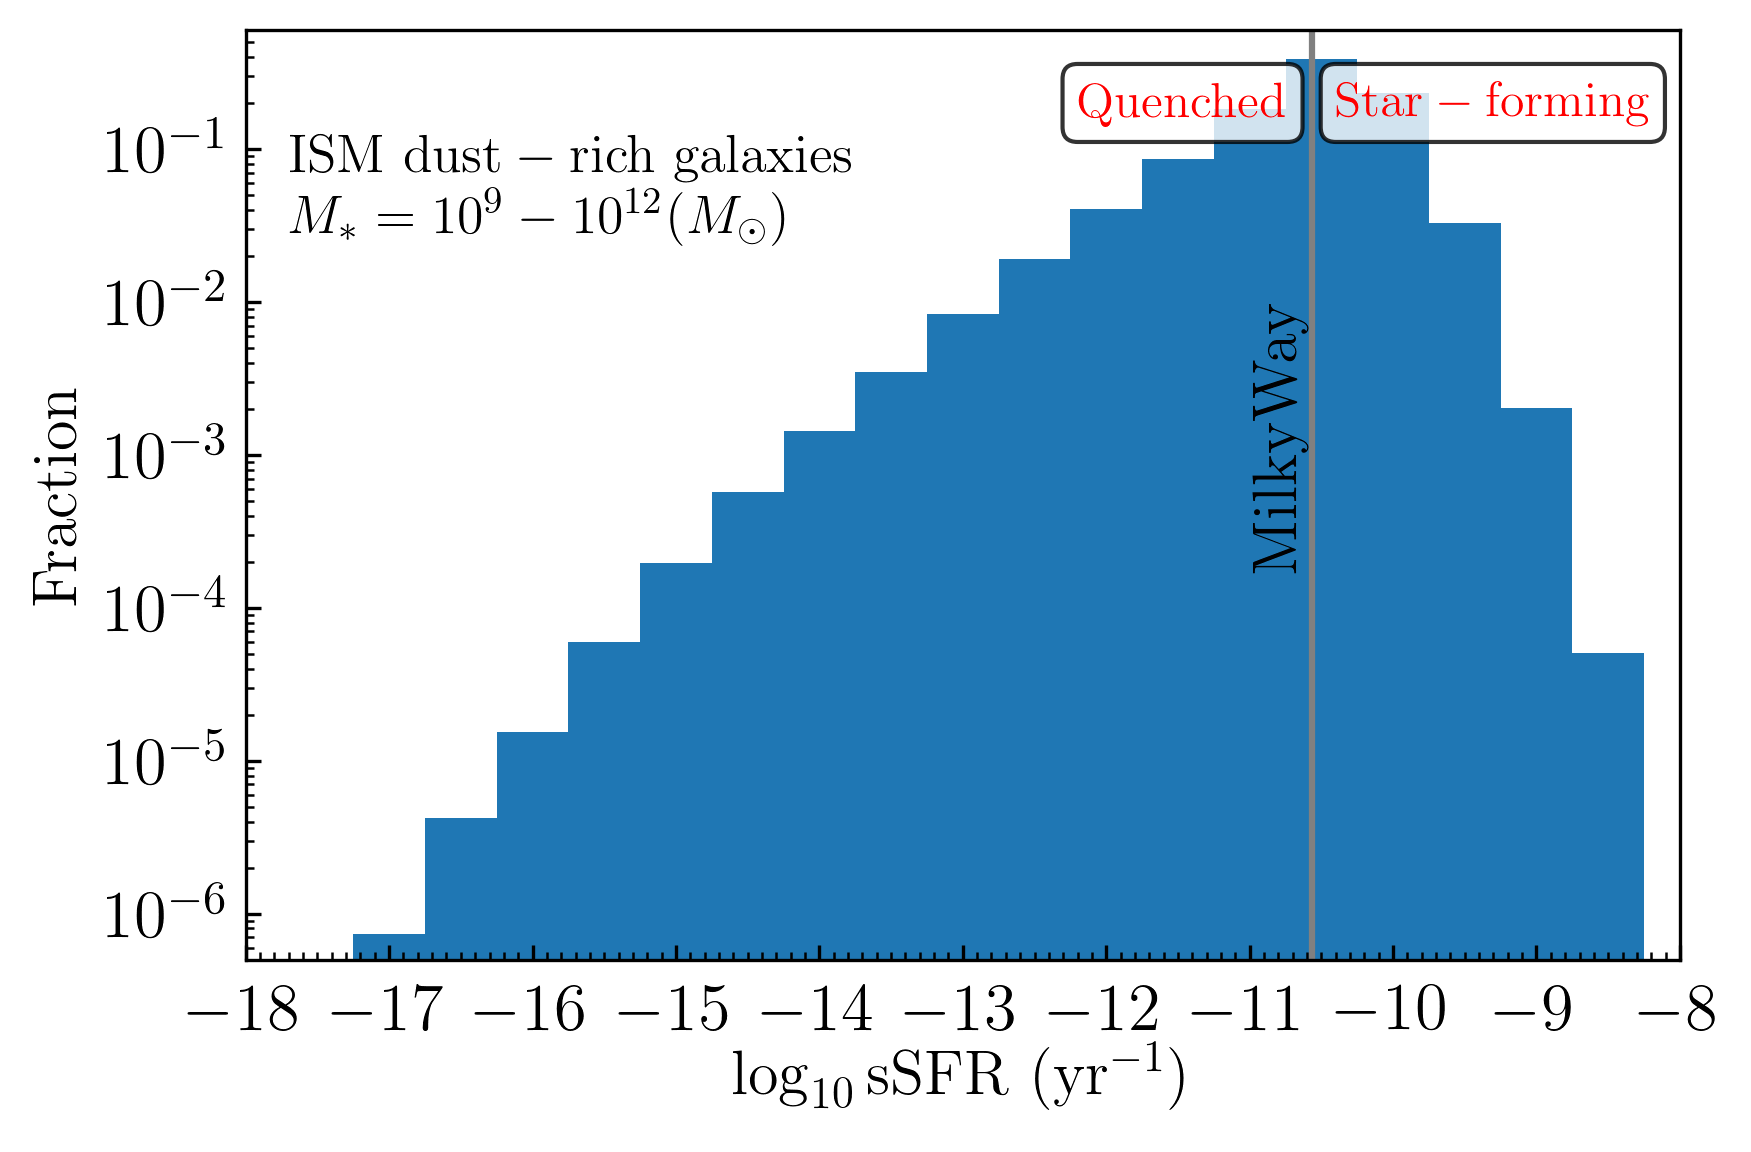

In [51]:
#fig, axes = plt.subplots(2, 1, sharex=True)
plt.figure()
ax = plt.subplot(111)
#ax.set_xticklabels([])

w = np.where((G_history[0].StellarMass * 1.e10 / Hubble_h > 1.e8) & 
             (G_history[0].ColdGas * 1.e10 / Hubble_h > 0) &
             (G_history[0].MetalsColdGas > 0))[0]

stellarmass = G_history[0].StellarMass[w] * 1.e10 / Hubble_h
bulge = G_history[0].BulgeMass[w] * 1.e10 / Hubble_h
sfr = G_history[0].SfrDisk[w] + G_history[0].SfrBulge[w]
dustmass = G_history[0].ColdDust[w] * 1.e10 / Hubble_h
dustfrac = dustmass / stellarmass

w = np.where(sfr<1e-8)[0]
sfr[w]=1e-8
ssfr = sfr/stellarmass

w = np.where((stellarmass > 1e9) & (stellarmass < 1e12) & (dustfrac > 1e-4))[0]
sfr_rich = np.log10(sfr[w])
ssfr_rich = np.log10(ssfr[w])

ssfr_max = -8
ssfr_min = -18
binwidth = 0.5
nbins = np.arange(ssfr_min, ssfr_max + binwidth, binwidth)
hist, bins = np.histogram(ssfr_rich, bins=nbins)
plt.bar(bins[:-1], hist/sum(hist), width=bins[1]-bins[0])

plt.axvline(x=ssfr_MW, color='grey')

w = np.where((ssfr_rich<sSFRcut) | (ssfr_rich==sSFRcut))[0]
print(len(w)/len(ssfr_rich))

plt.yscale('log')
#plt.yticks([0, 0.25, 0.5])
plt.ylim(0, 0.6)

plt.xlim(-18, -8)
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))

#ax.yaxis.set_minor_locator(plt.MultipleLocator(0.05))
ax.tick_params(axis='both', which='both', direction='in')


#---------------------------------------------------------------------------------------------
'''
ax = plt.subplot(212)

w = np.where((stellarmass > 1e9) & (stellarmass < 1e12) & (dustfrac < 1e-4))[0]
sfr_rich = np.log10(sfr[w])
ssfr = np.log10(ssfr[w])

ssfr_max = -8
ssfr_min = -18
nbins = np.arange(ssfr_min, ssfr_max + binwidth, binwidth)
#plt.hist(sfr_rich, bins=nbins, normed=1)

hist, bins = np.histogram(ssfr, bins=nbins)
plt.bar(bins[:-1], hist/sum(hist), width=bins[1]-bins[0])
plt.axvline(x=ssfr_MW, color='grey')

plt.ylim(0, 0.6)
plt.xlim(-18, -8)
w = np.where(ssfr>sSFRcut)[0]
print(len(w)/len(ssfr))

#fig.text(0.15, 0.53, r'$M_\mathrm{dust} > 1.0 \times 10^{7} (M_{\odot})$', fontsize=10)

fig.text(0.13, 0.5, r'$\mathrm{ISM}\ \mathrm{dust-poor}\ \mathrm{galaxies}$', fontsize=15)
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.05))
'''
plt.xticks([-18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8])
#plt.yticks([0, 0.25, 0.5])
#plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

plt.xlabel(r'$\log_{10} \mathrm{sSFR}\ (\mathrm{yr}^{-1})$', fontsize=15)
plt.ylabel(r'$\mathrm{Fraction}$', fontsize=15)
plt.text(-11, 0.0013, r'$\mathrm{MilkyWay}$', fontsize=15, color='k', va='center', rotation='vertical')
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.text(-12.2, 0.2, r'$\mathrm{Quenched}$', fontsize=12, color='red', va='center', bbox=props)
plt.text(-10.4, 0.2, r'$\mathrm{Star-forming}$', fontsize=12, color='red', va='center', bbox=props)
plt.text(-17.7, 0.07, r'$\mathrm{ISM}\ \mathrm{dust-rich}\ \mathrm{galaxies}$', fontsize=13)
plt.text(-17.7, 0.025, r'$ M_{*} = 10^{9} - 10^{12} (M_{\odot})$', fontsize=13)

#fig.text(0.0, 0.5, r'$\mathrm{Fraction}$', fontsize=15, va='center', rotation='vertical')
#plt.text(0.69, 0.43, r'$\mathrm{MilkyWay}$', fontsize=15, color='grey', va='center', rotation='vertical')
#fig.text(0.52, 0.87, r'$\mathrm{Quenched}$', fontsize=15, color='red', va='center')
#fig.text(0.69, 0.87, r'$\mathrm{Star-forming}$', fontsize=15, color='red', va='center')
#fig.text(0.13, 0.9, r'$\mathrm{ISM}\ \mathrm{dust-rich}\ \mathrm{galaxies}$', fontsize=15)
#fig.text(0.13, 0.6, r'$ M_{*} = 10^{9} - 10^{12} (M_{\odot})$', fontsize=15)

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('plots/sSFR-hist-allmass-512files.png')

## Old Fig 4: BTT-sSFR-Z

In [11]:
def compute_stats(w, btt, ssfr, metals):
    '''
    Computing median and errorbars to plot in the sSFR-BTT-Z region.
    Input: - index (list) -- list of selection index
           - btt (list) -- list of btt ratio where the stats would be computed
           - ssfr (list) -- list of ssfr ratio where the stats would be computed
           - metals (list) -- list of btt ratio where the stats would be computed
    Output: - median BTT mass ratio (float)
            - median sSFR (float)
            - median metallicity (float)
            - xerr (list) -- lower and upper errorbar in x-axis
            - yerr (list) -- lower and upper errorbar in y-axis
    '''
    xerr = []
    yerr = []
    btt_d = btt[w]
    ssfr_d = ssfr[w]
    metals_d = metals[w]
    
    med_ssfr_d = np.median(ssfr_d)
    med_btt_d = np.median(btt_d)
    med_metals_d = np.median(metals_d)

    low_ssfr_d = np.percentile(ssfr_d, 16)
    up_ssfr_d = np.percentile(ssfr_d, 84)
    xerr_low_d = abs(low_ssfr_d - med_ssfr_d)
    xerr_up_d = abs(up_ssfr_d - med_ssfr_d)
    xerr.append(xerr_low_d)
    xerr.append(xerr_up_d)
  
    low_btt_d = np.percentile(btt_d, 16)
    up_btt_d = np.percentile(btt_d, 84)
    yerr_low_d = abs(low_btt_d - med_btt_d)
    yerr_up_d = abs(up_btt_d - med_btt_d)
    yerr.append(yerr_low_d)
    yerr.append(yerr_up_d)

    #print(med_sfr_d, low_sfr_d, up_sfr_d)
    '''
    for i in range(len(xerr)):
        if xerr[i] > 10:
            print("xerr index=", i, "value=", xerr[i])
            xerr[i] = 1.0
        
    for i in range(len(yerr)):
        if yerr[i] > 10:
            print("yerr index=", i, "value=", yerr[i])
            yerr[i] = 1.0
    '''  
    return (med_ssfr_d, med_btt_d, med_metals_d, xerr, yerr)
    #return()

2
2
[3 4] [10.66  10.198] [7.268 7.108] [8.39266667 8.311     ]
2
0
0


/apps/skylake/software/mpi/gcc/6.4.0/openmpi/3.0.0/numpy/1.16.3-python-3.6.4/lib/python3.6/site-packages/numpy-1.16.3-py3.6-linux-x86_64.egg/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/apps/skylake/software/mpi/gcc/6.4.0/openmpi/3.0.0/numpy/1.16.3-python-3.6.4/lib/python3.6/site-packages/numpy-1.16.3-py3.6-linux-x86_64.egg/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


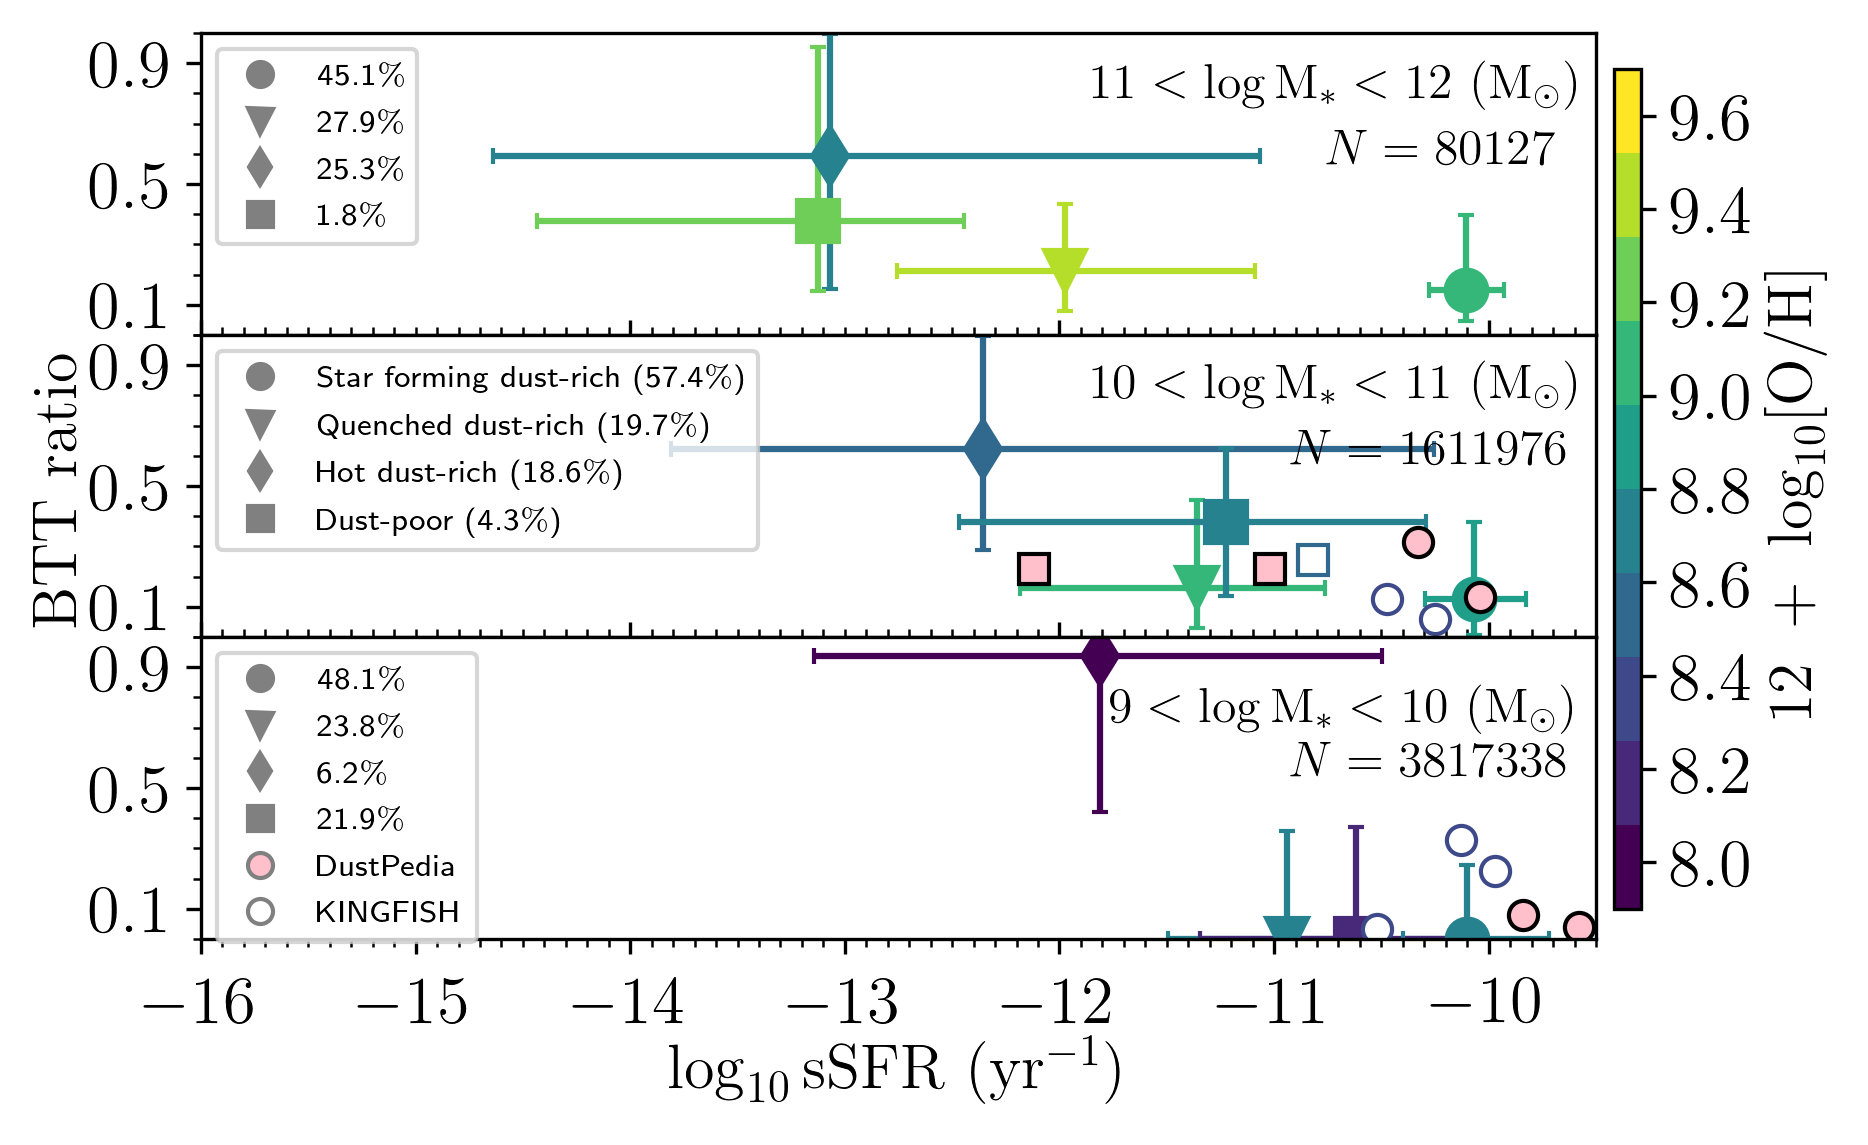

In [11]:


#w = np.where((G_history[0].MetalsColdGas > 0) & ( G_history[0].ColdGas / (G_history[0].StellarMass + G_history[0].ColdGas) > 0.0))[0]
w = np.where((G_history[0].StellarMass * 1.e10 / Hubble_h > 1.e9) & 
             (G_history[0].ColdGas * 1.e10 / Hubble_h > 1.e8) &
            (G_history[0].MetalsColdGas > 0))[0]
stellarmass = G_history[0].StellarMass[w] * 1.e10 / Hubble_h
all_bulge = G_history[0].BulgeMass[w] * 1.e10 / Hubble_h
all_metals = np.log10((G_history[0].MetalsColdGas[w] / G_history[0].ColdGas[w]) / 0.02) + 9.0
all_btt = all_bulge /stellarmass

all_hotdustfrac = G_history[0].HotDust[w] / G_history[0].StellarMass[w]
all_colddustfrac = G_history[0].ColdDust[w] / G_history[0].StellarMass[w]

all_sfr = np.log10(G_history[0].SfrDisk[w] + G_history[0].SfrBulge[w])
all_ssfr = np.log10((G_history[0].SfrDisk[w] + G_history[0].SfrBulge[w]) / stellarmass)

N=10
cm=plt.get_cmap('viridis', N)
norm=Normalize(vmin = 7.9, vmax=9.7)


#============================================================
#DustPedia Dataset (Nersesian et al. 2019)
SFR_obs = np.array([-1.2, -0.5, 0.25, 0.38, -0.14, -0.44])
Mstar_obs = np.array([10.92, 10.52, 10.58, 10.42, 9.7, 9.14])
sSFR_obs = SFR_obs - Mstar_obs
Mdust_obs = np.array([6.33, 6.38, 7, 7.28, 6.84, 6.07])
T_obs = [-4.71, -1.57, 1.44, 4.06, 6.68, 9.65]
logBD_obs = np.array([-0.54, -0.54, -0.34, -0.82, -1.06, -1.39])
BD_obs = 10**logBD_obs
BT_obs = BD_obs/(BD_obs+1)
'''
SFR_obs = np.array([-1.27, -1.05, -0.59, -0.61, -0.36, -0.4, 0.03, 0.42, 0.36, 0.47, 0.31, -0.05, -0.14, -0.56, -0.14, -0.77])
Mstar_obs = np.array([10.92, 10.94, 10.35, 10.48, 10.46, 10.74, 10.65, 10.48, 10.55, 10.4, 10.28, 9.83, 9.62, 9.27, 9.24, 9.08])
Mdust_obs = np.array([6.15, 6.6, 5.95, 6.12, 6.46, 6.74, 7, 7.01, 7.23, 7.31, 7.29, 6.94, 6.81, 6.46, 6.25, 5.93])
T_obs = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,10]
logBD_obs = np.array([-0.54, -0.54, -0.54, -0.54, -0.54, -0.31, -0.34, -0.54, -0.6, -0.82, -1.06, -1.23, -1.06, -1.49, -1.57, -1.39])
BD_obs = 10**logBD_obs
BT_obs = BD_obs/(BD_obs+1)
'''
#============================================================
#Remy-Ruyer et al. 2014

Z_rr, logdust_g_rr, logdust_ac_rr, logstar_rr, sfr_rr, category_rr, logBD_rr  = np.loadtxt('kingfish.txt', usecols=(3, 7, 9, 10, 11, 13, 14), unpack=True)

Mdust_rr = np.zeros(len(np.unique(category_rr)))
Mstar_rr = np.zeros(len(np.unique(category_rr)))
SFR_rr = np.zeros(len(np.unique(category_rr)))
metallicity_rr = np.zeros(len(np.unique(category_rr)))
BT_rr = np.zeros(len(np.unique(category_rr)))
sSFR_rr = np.zeros(len(np.unique(category_rr)))
#We are dividing galaxies in Remy-Ruyer 2014 samples based on their morphology:
#a.E b.S0 c.Sa-Sab d.Sb-Sc e.Scd=Sdm f.Sm-Irr

w = np.where(sfr_rr > 0.0)[0]
Z = Z_rr[w]
logdust = logdust_ac_rr[w]
logstar = logstar_rr[w]
logsfr = np.log10(sfr_rr[w])
logssfr = logsfr - logstar
category = category_rr[w]
logBD = logBD_rr[w]

for i in np.arange(1,7,1):
    w = np.where((category == i) & (logstar > 9))[0]
    #print(i)
    Mdust_rr[i-1] = mean(logdust[w])
    Mstar_rr[i-1] = mean(logstar[w])
    SFR_rr[i-1] = mean(logsfr[w])
    sSFR_rr[i-1] = mean(logssfr[w])
    metallicity_rr[i-1] = mean(Z[w])
    BD_a = 10 ** mean(logBD[w])
    BT_rr[i-1] = BD_a/(BD_a+1)
    
#============================================================

fig, axes = plt.subplots(3, 1, sharex=True)
yticks = [0.1, 0.5, 0.9]
xlim = (-16, -9.5)
ylim = (0, 1)

ax = plt.subplot(311)
ax.set_xticklabels([])

w = np.where((stellarmass > 1e11) & (stellarmass < 1e12))[0]
metals = all_metals[w]
btt = all_btt[w]
hotfrac = all_hotdustfrac[w]
dustfrac = all_colddustfrac[w]
ssfr = all_ssfr[w]

#Class A:
w = np.where((dustfrac > 1e-4) & (ssfr > ssfr_MW))[0]
med_ssfr_a, med_btt_a, med_metals_a, xerr_a, yerr_a  = compute_stats(w, btt, ssfr, metals)
NA = len(w)

#Class B:
w = np.where((dustfrac > 1e-4) & (ssfr < ssfr_MW))[0]
med_ssfr_b, med_btt_b, med_metals_b, xerr_b, yerr_b = compute_stats(w, btt, ssfr, metals)
NB = len(w)

#Class C:
w = np.where((dustfrac < 1e-4) & (hotfrac > 1e-4))[0]
med_ssfr_c, med_btt_c, med_metals_c, xerr_c, yerr_c = compute_stats(w, btt, ssfr, metals)
NC = len(w)

#Class D:
w = np.where((dustfrac < 1e-4) & (hotfrac < 1e-4))[0]
med_ssfr_d, med_btt_d, med_metals_d, xerr_d, yerr_d = compute_stats(w, btt, ssfr, metals)
ND = len(w)

NT_a = NA + NB + NC + ND
A = NA / NT_a * 100
B = NB / NT_a * 100
C = NC / NT_a * 100
D = ND / NT_a * 100

color_a =cm(norm(med_metals_a))
color_b =cm(norm(med_metals_b))
color_c =cm(norm(med_metals_c))
color_d =cm(norm(med_metals_d))
markersize=10
handles=[]

#sc = plt.scatter(med_sfr, med_btt, c=med_metals, s=percentage*5, marker='.', cmap=cm, zorder=10)
#clb = colorbar(ax=ax)

ax.errorbar(med_ssfr_a, med_btt_a, yerr=([yerr_a[0]], [yerr_a[1]]),
            xerr=([xerr_a[0]], [xerr_a[1]]), color=color_a, fmt='o', markersize=markersize,
            label="%.1f" % A + '$\%$')
ax.errorbar(med_ssfr_b, med_btt_b, yerr=([yerr_b[0]], [yerr_b[1]]),
            xerr=([xerr_b[0]], [xerr_b[1]]), color=color_b, fmt='v', markersize=markersize,
            label="%.1f" % B + '$\%$')
ax.errorbar(med_ssfr_c, med_btt_c, yerr=([yerr_c[0]], [yerr_c[1]]),
            xerr=([xerr_c[0]], [xerr_c[1]]), color=color_c, fmt='d', markersize=markersize,
            label="%.1f" % C + '$\%$')
ax.errorbar(med_ssfr_d, med_btt_d, yerr=([yerr_d[0]], [yerr_d[1]]),
            xerr=([xerr_d[0]], [xerr_d[1]]), color=color_d, fmt='s', markersize=markersize,
            label="%.1f" % D + '$\%$')

# get handles
handles, labels = ax.get_legend_handles_labels()

handles2 = [copy.copy(h[0]) for h in handles]

for h in handles2:
    h.set_color("grey")
    h.set_markersize(6.0)
    
ax.legend(handles2, labels, loc='upper left',prop={'size': 7.5})

plt.xlim(xlim)
plt.ylim(ylim)

ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
plt.yticks(yticks)
ax.tick_params(axis='x',which='both',direction='in')

#============================================================

ax = plt.subplot(312)
ax.set_xticklabels([])
w = np.where((stellarmass > 1e10) & (stellarmass < 1e11))[0]
metals = all_metals[w]
btt = all_btt[w]
hotfrac = all_hotdustfrac[w]
dustfrac = all_colddustfrac[w]
ssfr = all_ssfr[w]

#Class A:
w = np.where((dustfrac > 1e-4) & (ssfr > ssfr_MW))[0]
med_ssfr_a, med_btt_a, med_metals_a, xerr_a, yerr_a  = compute_stats(w, btt, ssfr, metals)
NA = len(w)

#Class B:
w = np.where((dustfrac > 1e-4) & (ssfr < ssfr_MW))[0]
med_ssfr_b, med_btt_b, med_metals_b, xerr_b, yerr_b = compute_stats(w, btt, ssfr, metals)
NB = len(w)

#Class C:
w = np.where((dustfrac < 1e-4) & (hotfrac > 1e-4))[0]
med_ssfr_c, med_btt_c, med_metals_c, xerr_c, yerr_c = compute_stats(w, btt, ssfr, metals)
NC = len(w)

#Class D:
w = np.where((dustfrac < 1e-4) & (hotfrac < 1e-4))[0]
med_ssfr_d, med_btt_d, med_metals_d, xerr_d, yerr_d = compute_stats(w, btt, ssfr, metals)
ND = len(w)

NT_b = NA + NB + NC + ND
A = NA / NT_b * 100
B = NB / NT_b * 100
C = NC / NT_b * 100
D = ND / NT_b * 100

color_a =cm(norm(med_metals_a))
color_b =cm(norm(med_metals_b))
color_c =cm(norm(med_metals_c))
color_d =cm(norm(med_metals_d))
markersize=10
handles=[]

#sc = plt.scatter(med_sfr, med_btt, c=med_metals, s=percentage*5, marker='.', cmap=cm, zorder=10)
#clb = colorbar(ax=ax)

ax.errorbar(med_ssfr_a, med_btt_a, yerr=([yerr_a[0]], [yerr_a[1]]),
         xerr=([xerr_a[0]], [xerr_a[1]]), color=color_a, fmt='o', markersize=10,
            label="Star forming dust-rich (%.1f" % A + '$\%$)')
ax.errorbar(med_ssfr_b, med_btt_b, yerr=([yerr_b[0]], [yerr_b[1]]),
         xerr=([xerr_b[0]], [xerr_b[1]]), color=color_b, fmt='v', markersize=10,
            label="Quenched dust-rich (%.1f" % B + '$\%$)')
ax.errorbar(med_ssfr_c, med_btt_c, yerr=([yerr_c[0]], [yerr_c[1]]), markersize=10,
         xerr=([xerr_c[0]], [xerr_c[1]]), color=color_c, fmt='d',
            label="Hot dust-rich (%.1f" % C + '$\%$)')
ax.errorbar(med_ssfr_d, med_btt_d, yerr=([yerr_d[0]], [yerr_d[0]]),
         xerr=([xerr_d[0]], [xerr_d[1]]), xuplims=0, color=color_d, fmt='s', markersize=10,
            label="Dust-poor (%.1f" % D + '$\%$)')

#Plot Dustpedia dataset
w = np.where((Mstar_obs > 10) & (Mstar_obs - Mdust_obs < 4) & (sSFR_obs > ssfr_MW))[0]
print(len(w))
sSFR_obs_a = sSFR_obs[w] 
BT_obs_a = BT_obs[w]
plt.errorbar(sSFR_obs_a, BT_obs_a, fmt='ko', markersize=7, mfc='pink')

w = np.where((Mstar_obs > 10) & (Mstar_obs - Mdust_obs < 4) & (sSFR_obs < ssfr_MW))[0]
sSFR_obs_b = sSFR_obs[w]
BT_obs_b = BT_obs[w]
plt.errorbar(sSFR_obs_b, BT_obs_b, fmt='kv', markersize=7, mfc='pink')

w = np.where((Mstar_obs > 10) & (Mstar_obs - Mdust_obs > 4))[0]
print(len(w))
sSFR_obs_d = sSFR_obs[w]
BT_obs_d = BT_obs[w]
plt.errorbar(sSFR_obs_d, BT_obs_d, fmt='ks', markersize=7, mfc='pink')

#Plot Remy-Ruyer dataset
w = np.where((Mstar_rr > 10) & (Mstar_rr - Mdust_rr < 4) & (sSFR_rr > ssfr_MW))[0]
print(w, Mstar_rr[w], Mdust_rr[w], metallicity_rr[w])
sSFR_rr_a = sSFR_rr[w]
BT_rr_a = BT_rr[w]
metal_color = np.median(metallicity_rr[w])
color_rr_a = cm(norm(metal_color))
plt.errorbar(sSFR_rr_a, BT_rr_a, color=color_rr_a, fmt='o', markersize=7, mfc='white')


w = np.where((Mstar_rr > 10) & (Mstar_rr - Mdust_rr > 4))[0]
sSFR_rr_d = sSFR_rr[w]
BT_rr_d = BT_rr[w]
metal_color = np.median(metallicity_rr[w])
color_rr_d = cm(norm(metal_color))
plt.errorbar(sSFR_rr_d, BT_rr_d, color=color_rr_d, fmt='s', markersize=7, mfc='white')


# get handles
handles, labels = ax.get_legend_handles_labels()

handles2 = [copy.copy(h[0]) for h in handles]

for h in handles2:
    h.set_color("grey")
    h.set_markersize(6.0)

leg = ax.legend(handles2, labels, loc='upper left', prop={'size': 7.5})
plt.xlim(xlim)
plt.ylim(ylim)

ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
plt.yticks(yticks)
ax.tick_params(axis='x',which='both',direction='in')

#============================================================
ax = plt.subplot(313)

w = np.where((stellarmass > 1e9) & (stellarmass < 1e10))[0]
metals = all_metals[w]
btt = all_btt[w]
hotfrac = all_hotdustfrac[w]
dustfrac = all_colddustfrac[w]
ssfr = all_ssfr[w]

#Class A:
w = np.where((dustfrac > 1e-4) & (ssfr > ssfr_MW))[0]
med_ssfr_a, med_btt_a, med_metals_a, xerr_a, yerr_a  = compute_stats(w, btt, ssfr, metals)
NA = len(w)

#Class B:
w = np.where((dustfrac > 1e-4) & (ssfr < ssfr_MW))[0]
med_ssfr_b, med_btt_b, med_metals_b, xerr_b, yerr_b = compute_stats(w, btt, ssfr, metals)
NB = len(w)

#Class C:
w = np.where((dustfrac < 1e-4) & (hotfrac > 1e-4))[0]
med_ssfr_c, med_btt_c, med_metals_c, xerr_c, yerr_c = compute_stats(w, btt, ssfr, metals)
NC = len(w)

#Class D:
w = np.where((dustfrac < 1e-4) & (hotfrac < 1e-4))[0]
med_ssfr_d, med_btt_d, med_metals_d, xerr_d, yerr_d = compute_stats(w, btt, ssfr, metals)
ND = len(w)

NT_c = NA + NB + NC + ND
A = NA / NT_c * 100
B = NB / NT_c * 100
C = NC / NT_c * 100
D = ND / NT_c * 100

color_a =cm(norm(med_metals_a))
color_b =cm(norm(med_metals_b))
color_c =cm(norm(med_metals_c))
color_d =cm(norm(med_metals_d))
markersize=10
handles=[]

#sc = plt.scatter(med_sfr, med_btt, c=med_metals, s=percentage*5, marker='.', cmap=cm, zorder=10)
#clb = colorbar(ax=ax)

ax.errorbar(med_ssfr_a, med_btt_a, yerr=([yerr_a[0]], [yerr_a[1]]),
         xerr=([xerr_a[0]], [xerr_a[1]]), color=color_a, fmt='o', markersize=10,
            label="%.1f" % A + '$\%$')
ax.errorbar(med_ssfr_b, med_btt_b, yerr=([yerr_b[0]], [yerr_b[1]]),
         xerr=([xerr_b[0]], [xerr_b[1]]), color=color_b, fmt='v', markersize=10,
            label="%.1f" % B + '$\%$')
ax.errorbar(med_ssfr_c, med_btt_c, yerr=([yerr_c[0]], [yerr_c[1]]), markersize=10,
         xerr=([xerr_c[0]], [xerr_c[1]]), color=color_c, fmt='d',
            label="%.1f" % C + '$\%$')
ax.errorbar(med_ssfr_d, med_btt_d, yerr=([yerr_d[0]], [yerr_d[1]]),
         xerr=([xerr_d[0]], [xerr_d[1]]), xuplims=0, color=color_d, fmt='s', markersize=10,
            label="%.1f" % D + '$\%$')

#Plot DustPedia dataset
w = np.where((Mstar_obs > 9) & (Mstar_obs < 10) & (Mstar_obs - Mdust_obs < 4) & (sSFR_obs > ssfr_MW))[0]
print(len(w))
sSFR_obs_a = sSFR_obs[w]
BT_obs_a = BT_obs[w]
plt.errorbar(sSFR_obs_a, BT_obs_a, fmt='ko', markersize=7, mfc='pink', label='DustPedia')

w = np.where((Mstar_obs > 9) & (Mstar_obs < 10) & (Mstar_obs - Mdust_obs < 4) & (sSFR_obs  < ssfr_MW))[0]
print(len(w))
sSFR_obs_b = sSFR_obs[w]
BT_obs_b = BT_obs[w]
plt.errorbar(sSFR_obs_b, BT_obs_b, fmt='kv', markersize=7, mfc='pink')

w = np.where((Mstar_obs > 9) & (Mstar_obs < 10)& (Mstar_obs - Mdust_obs > 4))[0]
print(len(w))
sSFR_obs_c = sSFR_obs[w]
BT_obs_c = BT_obs[w]
plt.errorbar(sSFR_obs_c, BT_obs_c, fmt='ks', markersize=7, mfc='white')

#Plot Remy-Ruyer dataset
w = np.where((Mstar_rr > 9) & (Mstar_rr < 10) & (Mstar_rr - Mdust_rr < 4) & (sSFR_rr > ssfr_MW))[0]
sSFR_rr_a = sSFR_rr[w]
BT_rr_a = BT_rr[w]
metal_color = np.median(metallicity_rr[w])
color_rr_a = cm(norm(metal_color))
plt.errorbar(sSFR_rr_a, BT_rr_a, color=color_rr_a, fmt='o', markersize=7, mfc='white', label="KINGFISH")

w = np.where((Mstar_rr > 9) & (Mstar_rr < 10) & (Mstar_rr - Mdust_rr < 4) & (sSFR_rr < ssfr_MW))[0]
sSFR_rr_b = sSFR_rr[w]
BT_rr_b = BT_rr[w]
metal_color = np.median(metallicity_rr[w])
color_rr_b = cm(norm(metal_color))
plt.errorbar(sSFR_rr_b, BT_rr_b, color=color_rr_b, fmt='v', markersize=7, mfc='white')

w = np.where((Mstar_rr > 9) & (Mstar_rr < 10) & (Mstar_rr - Mdust_rr > 4))[0]
sSFR_rr_d = sSFR_rr[w]
BT_rr_d = BT_rr[w]
metal_color = np.median(metallicity_rr[w])
color_rr_d = cm(norm(metal_color))
plt.errorbar(sSFR_rr_d, BT_rr_d, color=color_rr_d, fmt='s', markersize=7)

# get handles
handles, labels = ax.get_legend_handles_labels()

handles2 = [copy.copy(h[0]) for h in handles]

for h in handles2:
    h.set_color("grey")
    h.set_markersize(6.0)

leg = ax.legend(handles2, labels, loc='upper left',prop={'size': 7.5})

plt.xlim(xlim)
plt.ylim(ylim)

ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))

plt.yticks(yticks)
plt.xticks([-16, -15, -14, -13, -12, -11, -10])

plt.subplots_adjust(wspace=0, hspace=0.2)
plt.xlabel(r'$\log_{10} \mathrm{sSFR}\ (\mathrm{yr}^{-1})$', fontsize=15)
fig.text(0.03, 0.5, r'$\mathrm{BTT}\ \mathrm{ratio}$', fontsize=15, va='center', rotation='vertical')
fig.text(0.63, 0.3, r'$9 <\log \mathrm{M_*}<10\ (\mathrm{M_\odot})$')
fig.text(0.73, 0.26, r'$N = {:d}$'.format(NT_c))
fig.text(0.62, 0.57, r'$10 <\log \mathrm{M_*}<11\ (\mathrm{M_\odot})$')
fig.text(0.73, 0.52, r'$N = {:d}$'.format(NT_b))
fig.text(0.62, 0.82, r'$11 <\log \mathrm{M_*}<12\ (\mathrm{M_\odot})$')
fig.text(0.75, 0.77, r'$N = {:d}$'.format(NT_a))

#added colorbar
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.91, 0.15, 0.015, 0.7])
sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])
fig.colorbar(sm, cax=cbar_ax)
fig.text(1.0, 0.5, r'$12\ +\ \log_{10}[\mathrm{O/H}]$', fontsize=15, va='center', rotation='vertical')

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('plots/btt-ssfr-Z-512files-v2.png', bbox_inches='tight')

## New Fig 4: BTT - sSFR - Z

In [13]:
def plot_errorbarline(w, marker, color, tot_Ngal, all_btt, all_ssfr, all_metals, all_colddustfrac, all_hotdustfrac, all_stellarmass):

    metals = all_metals[w]
    btt = all_btt[w]
    hotfrac = all_hotdustfrac[w]
    dustfrac = all_colddustfrac[w]
    ssfr = all_ssfr[w]
    stellarmass = all_stellarmass[w]

    med_ssfr_a = []
    med_btt_a = []
    med_metals_a = []
    xerr = []
    yerr = []
    percentage = []
    stellarmass_limit = [1e9, 1e10, 1e11, 1e12]
    logmass_limit = [9, 10, 11, 12]
    size = [8,12,16]
    for i in range(len(stellarmass_limit) - 1):
        w = np.where((stellarmass > stellarmass_limit[i]) & (stellarmass < stellarmass_limit[i+1]))[0]
        percentage.append(len(w) / tot_Ngal * 100)
        stats_a = compute_stats(w, btt, ssfr, metals)
        #print(len(btt), len(w))
        
        btt_d = btt[w]
        ssfr_d = ssfr[w]
        metals_d = metals[w]
        
        med_ssfr_a.append(stats_a[0])
        med_btt_a.append(stats_a[1])
        med_metals_a.append(stats_a[2])
        xerr.append(stats_a[3])
        yerr.append(stats_a[4])
    xerr_a = np.array(xerr).T
    yerr_a = np.array(yerr).T
    
    if marker == 'o':
        for i in range(len(med_ssfr_a)):
            print(yerr_a[0][i], yerr_a[1][i])
            ax.errorbar(med_ssfr_a[i], med_btt_a[i], yerr=([yerr_a[0][i]], [yerr_a[1][i]]),
                        xerr=([xerr_a[0][i]], [xerr_a[1][i]]), color=cm(norm(med_metals_a[i])),marker=marker, 
                        markersize=size[i], lw=0.7,
                        label=r'$\log \mathrm{M_*} (M_\odot) = %d - %d\ (%.1f$' %(logmass_limit[i], logmass_limit[i+1], percentage[i]) + r'$\%)$')
    else:
        for i in range(len(med_ssfr_a)):
            ax.errorbar(med_ssfr_a[i], med_btt_a[i], yerr=([yerr_a[0][i]], [yerr_a[1][i]]),
                        xerr=([xerr_a[0][i]], [xerr_a[1][i]]), color=cm(norm(med_metals_a[i])), marker=marker, 
                        markersize=size[i], lw=0.7, label=r'$(%.1f$' %percentage[i] + r'$\%)$')
            
    ax.plot(med_ssfr_a, med_btt_a, ls='-', c=color, lw=2)
    return()

In [14]:
def compute_Ngal(stellarmass):
    stellarmass_limit = [1e9, 1e10, 1e11, 1e12]
    for i in range(len(stellarmass_limit) - 1):
        w = np.where((stellarmass > stellarmass_limit[i]) & (stellarmass < stellarmass_limit[i+1]))[0]
        N_gal.append(len(w))
    return ()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


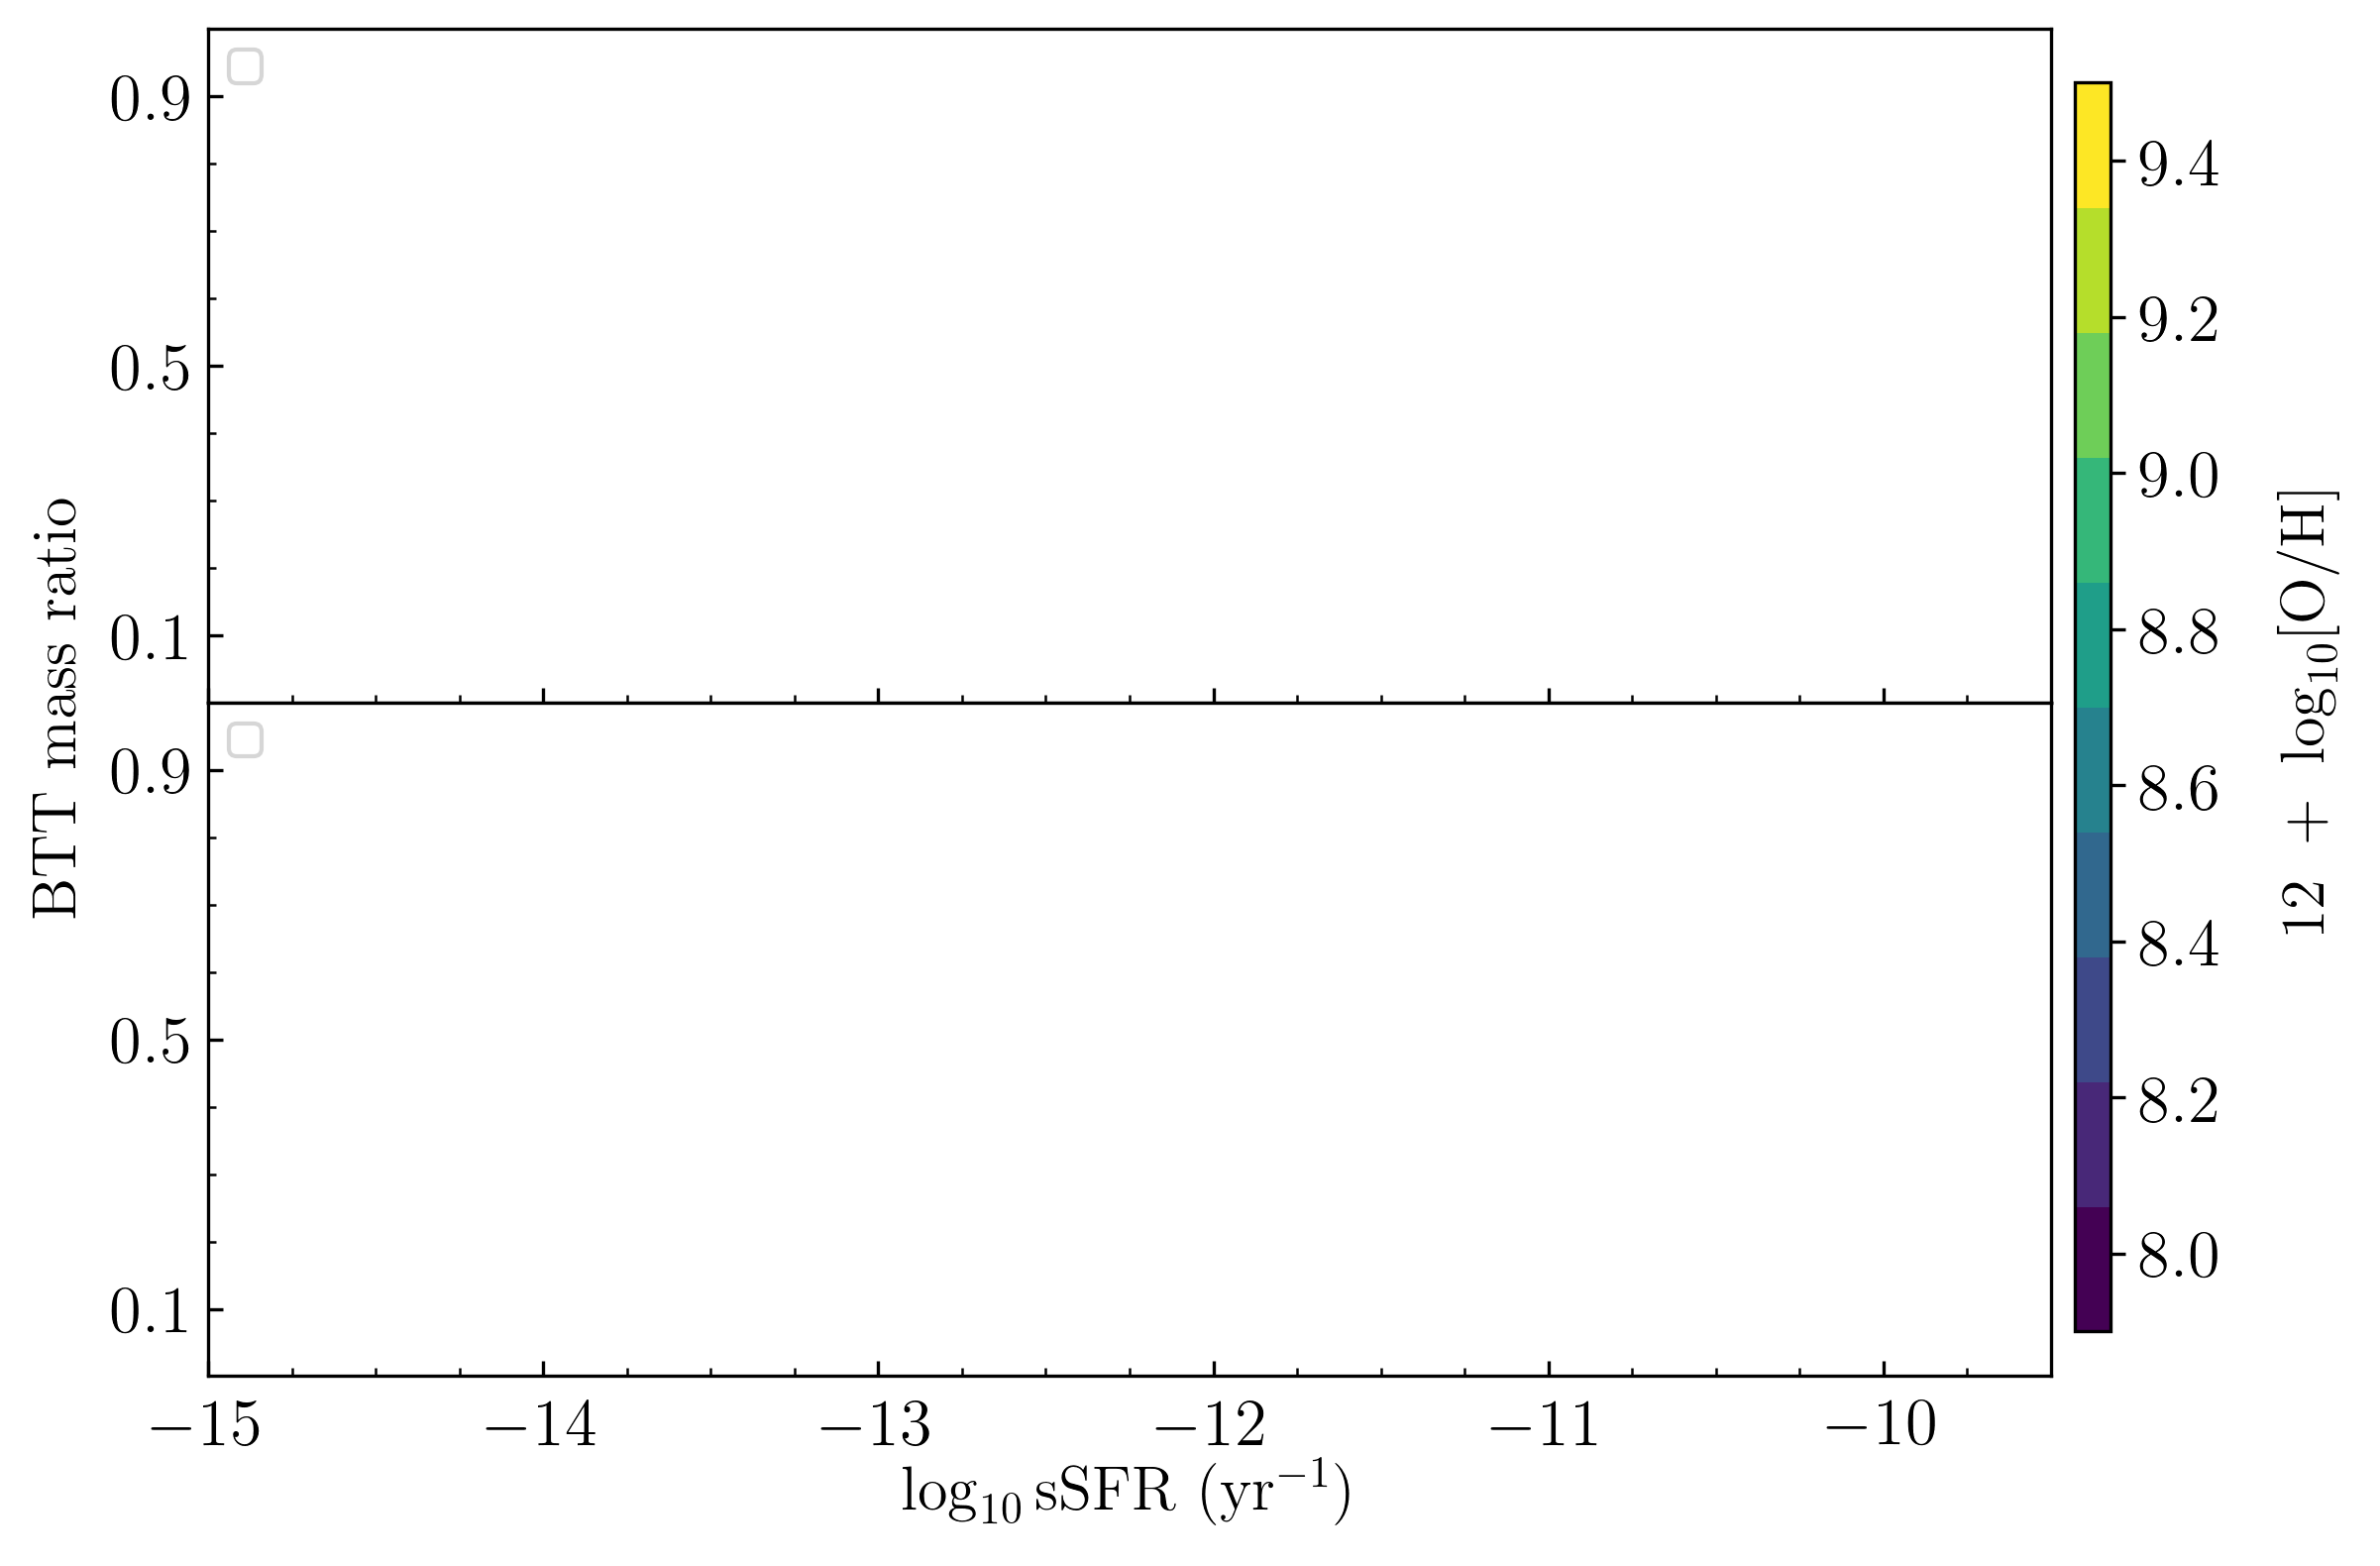

In [22]:
#DustPedia Dataset (Nersesian et al. 2019)
SFR_obs = np.array([-1.2, -0.5, 0.25, 0.38, -0.14, -0.44])
Nobj_obs = np.array([71,197, 90, 191, 162, 103])
Mstar_obs = np.array([10.92, 10.52, 10.58, 10.42, 9.7, 9.14])
sSFR_obs = SFR_obs - Mstar_obs
Mdust_obs = np.array([6.33, 6.38, 7, 7.28, 6.84, 6.07])
T_obs = [-4.71, -1.57, 1.44, 4.06, 6.68, 9.65]
logBD_obs = np.array([-0.54, -0.54, -0.34, -0.82, -1.06, -1.39])
BD_obs = 10**logBD_obs
BT_obs = BD_obs/(BD_obs+1)

def find_mean(prop, Nobj):
    return np.sum(prop * Nobj) / np.sum(Nobj)

#ISM dust-poor galaxy
w = np.where(Mdust_obs - Mstar_obs < -4)[0]
BT_obs_poor = find_mean(BT_obs[w], Nobj_obs[w])
sSFR_obs_poor = find_mean(sSFR_obs[w], Nobj_obs[w])

#SF ISM dust-rich galaxy
w = np.where((Mdust_obs - Mstar_obs > -4) & (sSFR_obs > ssfr_MW))[0]
BT_obs_SFrich = find_mean(BT_obs[w], Nobj_obs[w])
sSFR_obs_SFrich = find_mean(sSFR_obs[w], Nobj_obs[w])

#============================================================
#Remy-Ruyer et al. 2014

Z_rr, logdust_g_rr, logdust_ac_rr, logstar_rr, sfr_rr, category_rr, logBD_rr  = np.loadtxt('kingfish.txt', usecols=(3, 7, 9, 10, 11, 13, 14), unpack=True)

Mdust_rr = np.zeros(len(np.unique(category_rr)))
Mstar_rr = np.zeros(len(np.unique(category_rr)))
SFR_rr = np.zeros(len(np.unique(category_rr)))
metallicity_rr = np.zeros(len(np.unique(category_rr)))
BT_rr = np.zeros(len(np.unique(category_rr)))
sSFR_rr = np.zeros(len(np.unique(category_rr)))
#We are dividing galaxies in Remy-Ruyer 2014 samples based on their morphology:
#a.E b.S0 c.Sa-Sab d.Sb-Sc e.Scd=Sdm f.Sm-Irr

w = np.where(sfr_rr > 0.0)[0]
Z = Z_rr[w]
logdust = logdust_ac_rr[w]
logstar = logstar_rr[w]
logsfr = np.log10(sfr_rr[w])
logssfr = logsfr - logstar
category = category_rr[w]
logBD = logBD_rr[w]

#ISM dust-poor
w = np.where((logstar > 9) & (logdust-logstar < -4))[0]
sSFR_rr_poor = mean(logssfr[w])
BD_rr_poor = 10 ** mean(logBD[w])
BT_rr_poor = BD_rr_poor / (BD_rr_poor + 1)
metallicity_rr_poor = mean(Z[w])

#SF ISM dust-rich
w = np.where((logstar > 9) & (logdust-logstar > -4) & (logssfr > ssfr_MW))[0]
sSFR_rr_SFrich = mean(logssfr[w])
BD_rr_SFrich = 10 ** mean(logBD[w])
BT_rr_SFrich = BD_rr_poor / (BD_rr_poor + 1)
metallicity_rr_SFrich = mean(Z[w])

#============================================================


#w = np.where((G_history[0].MetalsColdGas > 0) & ( G_history[0].ColdGas / (G_history[0].StellarMass + G_history[0].ColdGas) > 0.0))[0]
w = np.where((G_history[0].StellarMass * 1.e10 / Hubble_h > 1.e9) & 
             (G_history[0].ColdGas * 1.e10 / Hubble_h > 1.e8) &
            (G_history[0].MetalsColdGas > 0))[0]
all_stellarmass = G_history[0].StellarMass[w] * 1.e10 / Hubble_h
all_bulge = G_history[0].BulgeMass[w] * 1.e10 / Hubble_h
all_metals = np.log10((G_history[0].MetalsColdGas[w] / G_history[0].ColdGas[w]) / 0.02) + 9.0
all_btt = all_bulge / all_stellarmass

all_hotdustfrac = G_history[0].HotDust[w] / G_history[0].StellarMass[w]
all_colddustfrac = G_history[0].ColdDust[w] / G_history[0].StellarMass[w]

all_ssfr = np.log10((G_history[0].SfrDisk[w] + G_history[0].SfrBulge[w]) / all_stellarmass)

N=10
cm=plt.get_cmap('viridis', N)
norm=Normalize(vmin = 7.9, vmax=9.5)

#===============================================================

N_gal = []

marker = ['o', 'v', 'd', 's']
color = ('purple', 'g', 'b', 'r')


#SF ISM rich:
w_a = np.where((all_colddustfrac > 1e-4) & (all_ssfr > ssfr_MW))[0]
compute_Ngal(all_stellarmass[w_a])

#SF ISM poor:
w_b = np.where((all_colddustfrac > 1e-4) & (all_ssfr < ssfr_MW))[0]
compute_Ngal(all_stellarmass[w_b])

#Halo rich:
w_c = np.where((all_colddustfrac < 1e-4) & (all_hotdustfrac > 1e-4))[0]
compute_Ngal(all_stellarmass[w_b])

#Dust poor:
w_d = np.where((all_colddustfrac < 1e-4) & (all_hotdustfrac < 1e-4))[0]
compute_Ngal(all_stellarmass[w_b])
total_Ngal = sum(N_gal)

#===============================================================
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(8,6))

ax = plt.subplot(211)
ax.set_xticklabels([])

yticks = [0.1, 0.5, 0.9]
xticks = [-15, -14, -13, -12, -11, -10]
xlim = (-15, -9.5)
ylim = (0, 1)

#plot_errorbarline(w_c, marker[2], color[2], total_Ngal, all_btt, all_ssfr, all_metals, all_colddustfrac, all_hotdustfrac, all_stellarmass)
#plot_errorbarline(w_d, marker[3], color[3], total_Ngal, all_btt, all_ssfr, all_metals, all_colddustfrac, all_hotdustfrac, all_stellarmass)
#plt.axvline(x=ssfr_MW, color='grey')

#Plot observed dataset

#plt.errorbar(sSFR_obs_poor, BT_obs_poor, fmt='ks', markersize=10, mfc='pink', label='DustPedia')
color_rr_poor = cm(norm(metallicity_rr_poor))
#plt.errorbar(sSFR_rr_poor, BT_rr_poor, color=color_rr_poor, fmt='s', markersize=10, mfc='white', label='KINGFISH')

plt.legend(loc='upper left', fontsize=10)

#plt.text(-11, 0.85, 'ISM dust-poor',fontsize=20)
#plt.text(-10.8, 0.3, 'Dust-poor', color='r', fontsize=15)
#plt.text(-13, 0.7, 'Halo dust-rich', color='b', fontsize=15)

plt.ylim(ylim)
plt.xlim(xlim)
plt.yticks(yticks)
plt.xticks(xticks)
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.25))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.tick_params(axis='x',which='both',direction='in')
ax.tick_params(axis='y',which='both',direction='in')
#===============================================================

ax = plt.subplot(212)

#plot_errorbarline(w_a, marker[0], color[0], total_Ngal, all_btt, all_ssfr, all_metals, all_colddustfrac, all_hotdustfrac, all_stellarmass)
#plot_errorbarline(w_b, marker[1], color[1], total_Ngal, all_btt, all_ssfr, all_metals, all_colddustfrac, all_hotdustfrac, all_stellarmass)
#plt.axvline(x=ssfr_MW, color='grey')

#plt.errorbar(sSFR_obs_SFrich, BT_obs_SFrich, fmt='ko', markersize=10, mfc='pink', label='DustPedia')
color_rr_SFrich = cm(norm(metallicity_rr_SFrich))
#plt.errorbar(sSFR_rr_SFrich, BT_rr_SFrich, color=color_rr_SFrich, fmt='o', markersize=10, mfc='white', label='KINGFISH')

plt.legend(loc='upper left', fontsize=10)

#plt.text(-11, 0.85, 'ISM dust-rich', fontsize=20)
#plt.text(-10.5, 0.4, 'Star-forming', color='purple', fontsize=15)
#plt.text(-12.5, 0.3, 'Quenched', color='g',  fontsize=15)
#plt.text(-11.6, 0.5, 'MilkyWay', color='grey', fontsize=15, rotation='vertical')

plt.ylim(ylim)
plt.xlim(xlim)
plt.yticks(yticks)
plt.xticks(xticks)
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.25))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.tick_params(axis='x',which='both',direction='in')
ax.tick_params(axis='y',which='both',direction='in')

plt.subplots_adjust(wspace=0, hspace=0)
plt.xlabel(r'$\log_{10} \mathrm{sSFR}\ (\mathrm{yr}^{-1})$', fontsize=15)
fig.text(0.05, 0.5, r'$\mathrm{BTT}\ \mathrm{mass}\ \mathrm{ratio}$', fontsize=15, va='center', rotation='vertical')

#===============================================================

#added colorbar
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.91, 0.15, 0.015, 0.7])
sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])
fig.colorbar(sm, cax=cbar_ax)
fig.text(1.0, 0.5, r'$12\ +\ \log_{10}[\mathrm{O/H}]$', fontsize=15, va='center', rotation='vertical')
plt.savefig('plots/btt-ssfr-Z-512files-dtr_0.png', bbox_inches='tight')

## Fig 7: BTT - sSFR - Z evolution

In [16]:

def plot_redshift(lowmass, himass, lowcold, hicold, lowlogssfr, hilogssfr, lowhot, hihot, tot_Ngal_z, marker, color):
    #w = np.where((G_history[0].MetalsColdGas > 0) & ( G_history[0].ColdGas / (G_history[0].StellarMass + G_history[0].ColdGas) > 0.0))[0]
    z = [3, 2, 1, 0]
    med_ssfr = []
    med_btt = []
    size = [15,12,10,8]

    for i in z:
        w = np.where((G_history[i].StellarMass * 1.e10 / Hubble_h > 1.e9) & 
                     (G_history[i].ColdGas * 1.e10 / Hubble_h > 1.e8) &
                    (G_history[i].MetalsColdGas > 0))[0]
        all_stellarmass = G_history[i].StellarMass[w] * 1.e10 / Hubble_h
        all_bulge = G_history[i].BulgeMass[w] * 1.e10 / Hubble_h
        all_metals = np.log10((G_history[i].MetalsColdGas[w] / G_history[i].ColdGas[w]) / 0.02) + 9.0
        all_btt = all_bulge / all_stellarmass

        all_hotdustfrac = G_history[i].HotDust[w] / G_history[i].StellarMass[w]
        all_colddustfrac = G_history[i].ColdDust[w] / G_history[i].StellarMass[w]

        all_ssfr = np.log10((G_history[i].SfrDisk[w] + G_history[i].SfrBulge[w]) / all_stellarmass)
        
        w = np.where((all_stellarmass > lowmass) & (all_stellarmass < himass) &
                    (all_colddustfrac > lowcold) & (all_colddustfrac < hicold) & 
                    (all_ssfr > lowlogssfr) & (all_ssfr < hilogssfr) &
                    (all_hotdustfrac > lowhot) & (all_hotdustfrac < hihot))[0]

        if len(w) > 0:
            
            stellarmass = all_stellarmass[w]

            stats = compute_stats(w, all_btt, all_ssfr, all_metals)
            med_ssfr_a = stats[0]
            med_btt_a = stats[1]
            med_metals_a = stats[2]
            print(med_metals_a)
            xerr_a = stats[3]
            yerr_a = stats[4]
            med_ssfr.append(med_ssfr_a)
            med_btt.append(med_btt_a)

            if marker == 'd':
                ax.errorbar(med_ssfr_a, med_btt_a, yerr=([yerr_a[0]], [yerr_a[1]]),
                            xerr=([xerr_a[0]], [xerr_a[1]]), color=cm(norm(med_metals_a)),marker=marker, 
                            markersize=size[i], lw=0.7, label=r"$z=%d\ (%.1f$" %(i, len(w)/tot_Ngal_z*100) + r'$\%)$')
            else:
                ax.errorbar(med_ssfr_a, med_btt_a, yerr=([yerr_a[0]], [yerr_a[1]]),
                            xerr=([xerr_a[0]], [xerr_a[1]]), color=cm(norm(med_metals_a)),marker=marker, 
                            markersize=size[i], lw=0.7, label=r"$%.1f$" %(len(w)/tot_Ngal_z*100) + r'$\%$')

    ax.plot(med_ssfr, med_btt, '-', c=color, lw=2.0)
    return()

In [17]:
def compute_Ngal_z(lowmass, himass, lowcold, hicold, lowlogssfr, hilogssfr, lowhot, hihot):
    z = [3, 2, 1, 0]
    for i in z:
        w = np.where((G_history[i].StellarMass * 1.e10 / Hubble_h > 1.e9) & 
                     (G_history[i].ColdGas * 1.e10 / Hubble_h > 1.e8) &
                    (G_history[i].MetalsColdGas > 0))[0]
        
        all_stellarmass = G_history[i].StellarMass[w] * 1.e10 / Hubble_h
        all_bulge = G_history[i].BulgeMass[w] * 1.e10 / Hubble_h
        all_metals = np.log10((G_history[i].MetalsColdGas[w] / G_history[i].ColdGas[w]) / 0.02) + 9.0
        all_btt = all_bulge / all_stellarmass

        all_hotdustfrac = G_history[i].HotDust[w] / G_history[i].StellarMass[w]
        all_colddustfrac = G_history[i].ColdDust[w] / G_history[i].StellarMass[w]

        all_ssfr = np.log10((G_history[i].SfrDisk[w] + G_history[i].SfrBulge[w]) / all_stellarmass)
        
        w = np.where((all_stellarmass > lowmass) & (all_stellarmass < himass) &
                    (all_colddustfrac > lowcold) & (all_colddustfrac < hicold) & 
                    (all_ssfr > lowlogssfr) & (all_ssfr < hilogssfr) &
                    (all_hotdustfrac > lowhot) & (all_hotdustfrac < hihot))[0]
        if len(w) > 0:
            Ngal_z.append(len(w))
        
    return()


8.505449
8.538935
8.567846
8.539663
8.399238
8.512049
8.639632
8.675026
8.774527
8.899833
8.97078
8.952369
9.199369
9.216674
9.218009
9.069459


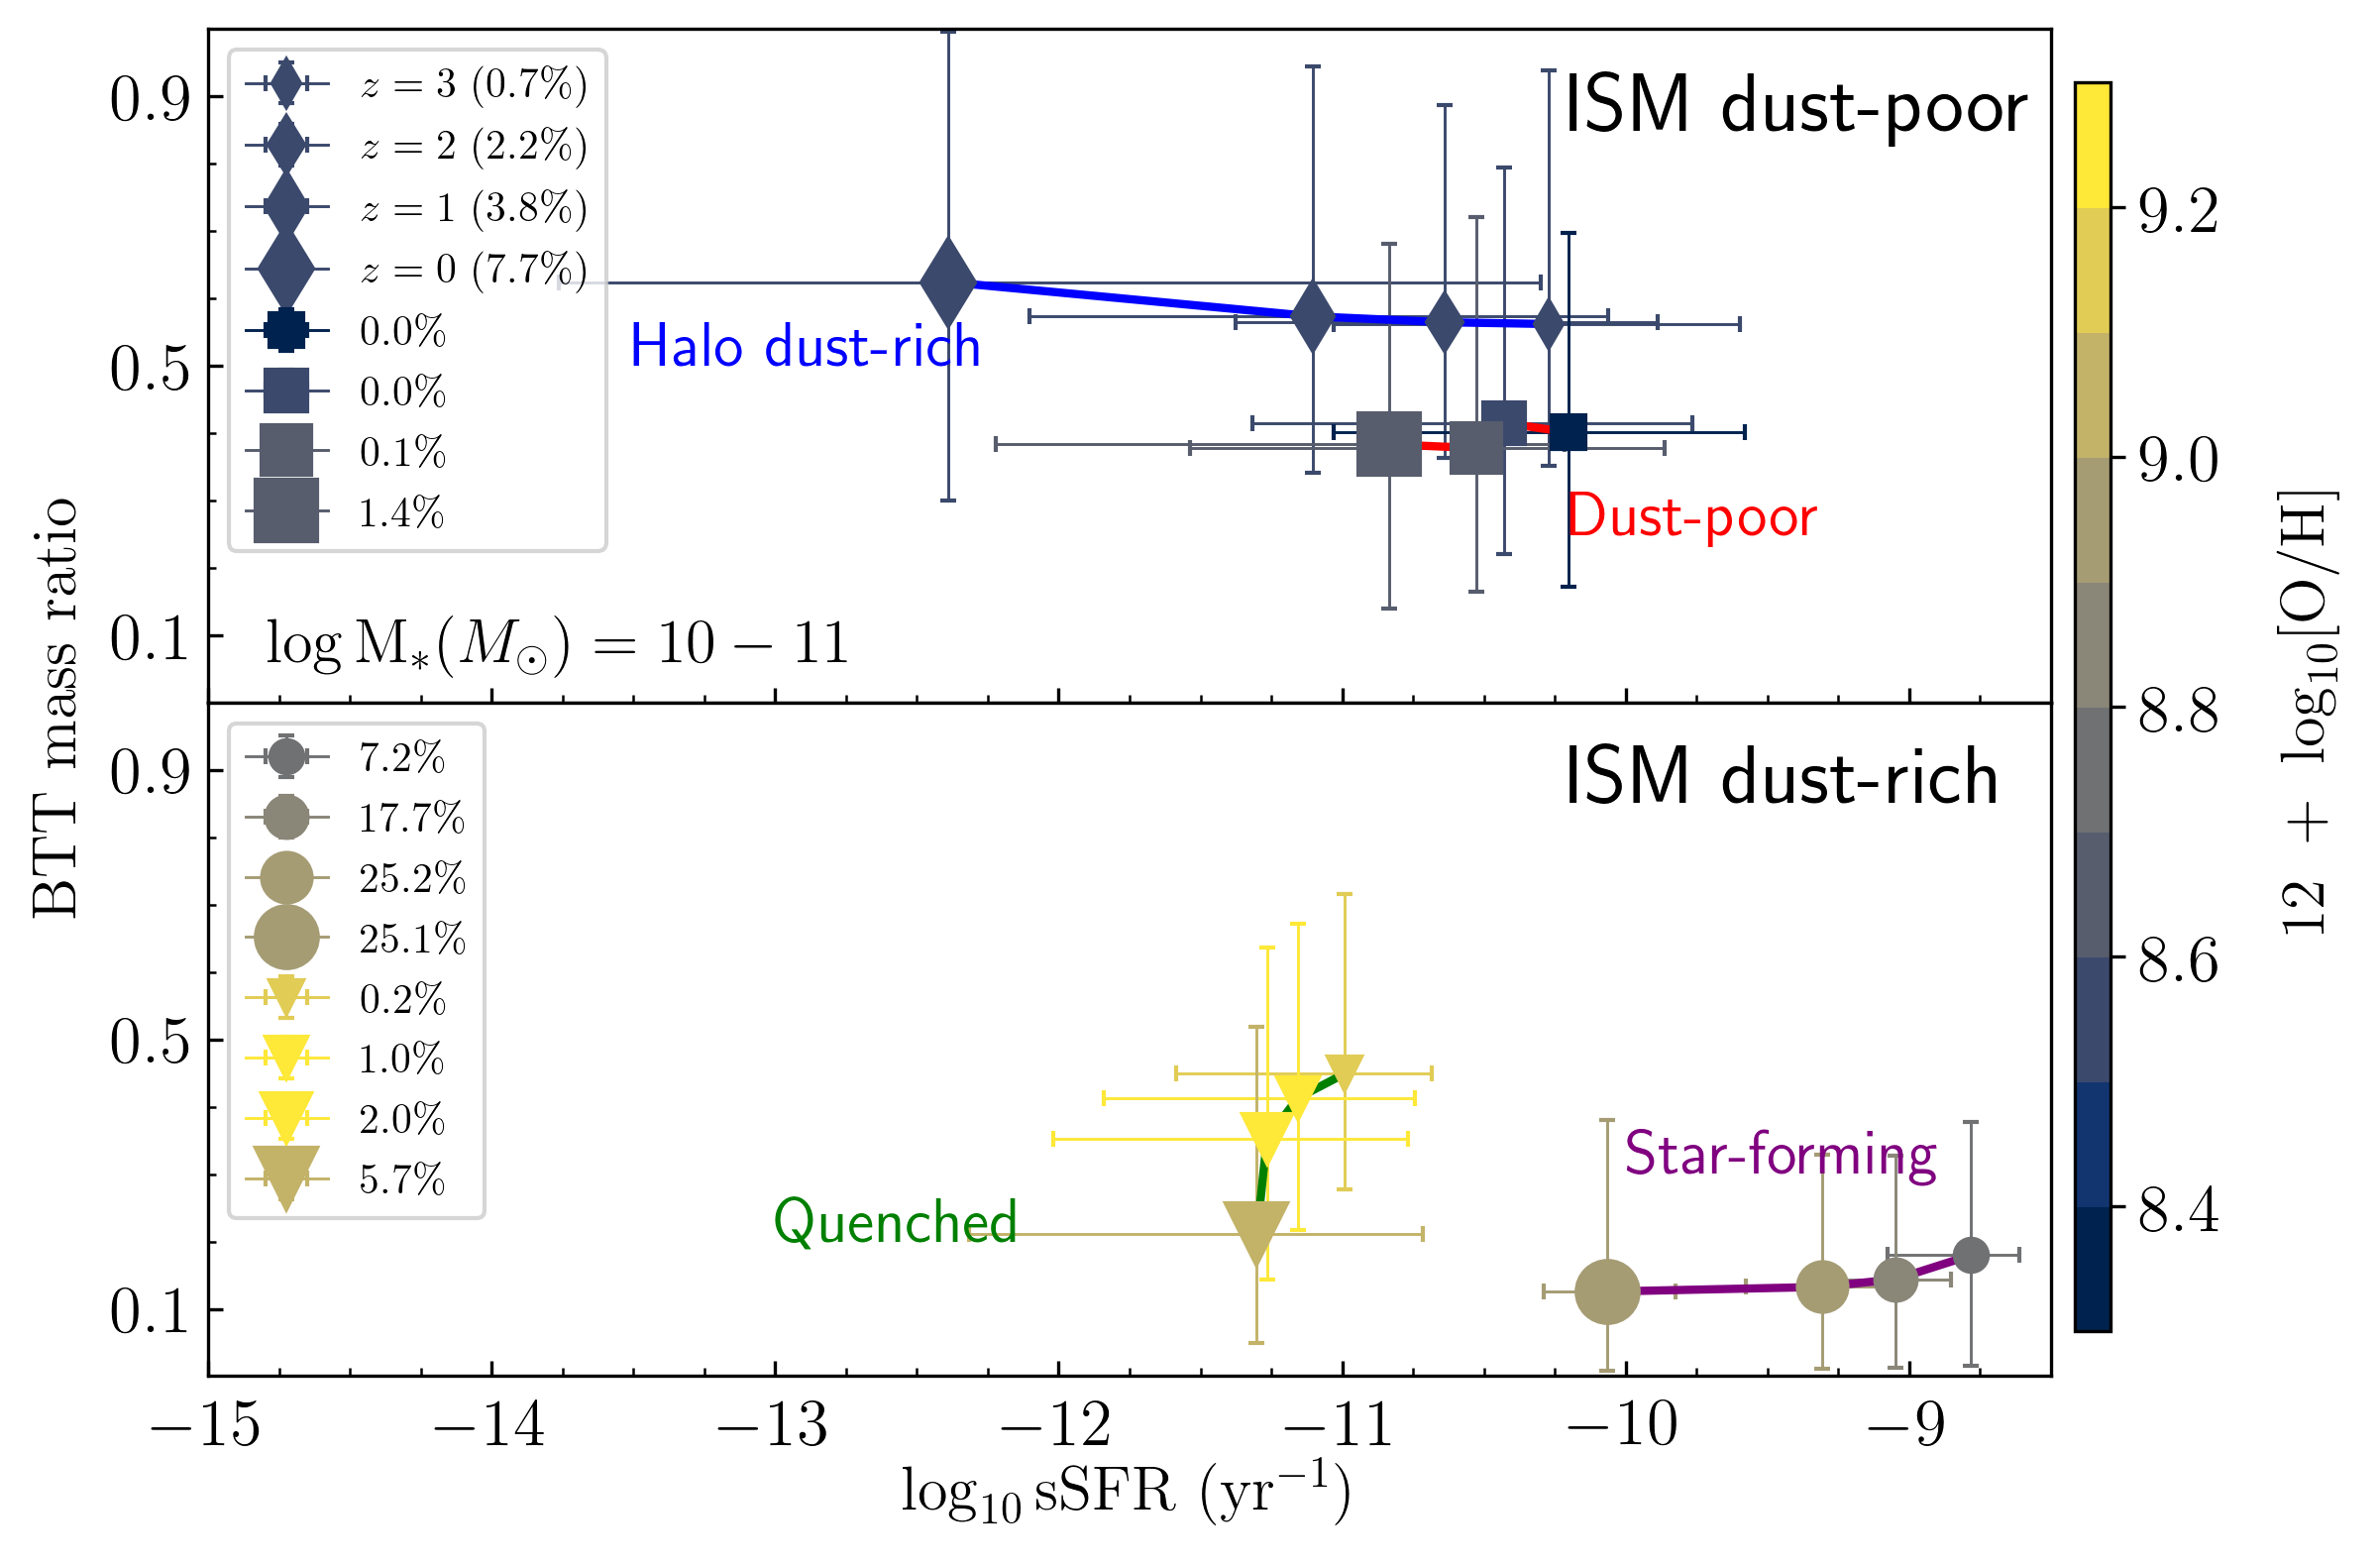

In [19]:

N=10
cm=plt.get_cmap('cividis', N)
norm=Normalize(vmin = 8.3, vmax=9.3)

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

ax = plt.subplot(211)
ax.set_xticklabels([])

yticks = [0.1, 0.5, 0.9]
xticks = [-15, -14, -13, -12, -11, -10, -9]
xlim = (-15, -8.5)
ylim = (0, 1)

marker = ['d', 's', 'o', 'v']
color = ['b', 'r', 'purple', 'g']
Ngal_z = []

compute_Ngal_z(1e10, 1e11, 0, 1e-4, -50, 10, 1e-4, 1)
compute_Ngal_z(1e10, 1e11, 0, 1e-4, -50, 10, 0, 1e-4)
compute_Ngal_z(1e10, 1e11, 1e-4, 1, ssfr_MW, 1, 0, 1)
compute_Ngal_z(1e10, 1e11, 1e-4, 1, -50, ssfr_MW, 0, 1)
tot_Ngal_z = sum(Ngal_z)

#Hot dust-rich
plot_redshift(1e10, 1e11, 0, 1e-4, -50, 10, 1e-4, 1, tot_Ngal_z, marker[0], color[0])
#Q ISM dust-rich
plot_redshift(1e10, 1e11, 0, 1e-4, -50, 10, 0, 1e-4, tot_Ngal_z, marker[1], color[1])

#plt.axvline(x=ssfr_MW, color='grey')
plt.legend(loc='upper left', fontsize=10)

plt.text(-10.2, 0.85, 'ISM dust-poor', fontsize=20)
plt.text(-13.5, 0.5, 'Halo dust-rich', color=color[0], fontsize=15)
plt.text(-10.2, 0.25, 'Dust-poor', color=color[1], fontsize=15)

plt.ylim(ylim)
plt.xlim(xlim)
plt.yticks(yticks)
plt.xticks(xticks)
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.25))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.tick_params(axis='x',which='both',direction='in')
ax.tick_params(axis='y',which='both',direction='in')
#===============================================================

ax = plt.subplot(212)

#SF ISM dust-rich
plot_redshift(1e10, 1e11, 1e-4, 1, ssfr_MW, 1, 0, 1, tot_Ngal_z,marker[2], color[2])
#Q ISM dust-rich
plot_redshift(1e10, 1e11, 1e-4, 1, -50, ssfr_MW, 0, 1, tot_Ngal_z,marker[3], color[3])

#plt.axvline(x=ssfr_MW, color='grey')
plt.legend(loc='upper left', fontsize=10)

plt.text(-10.2, 0.85, 'ISM dust-rich', fontsize=20)
plt.text(-10, 0.3, 'Star-forming', color=color[2],fontsize=15)
plt.text(-13, 0.2, 'Quenched', color=color[3], fontsize=15)

plt.ylim(ylim)
plt.xlim(xlim)
plt.yticks(yticks)
plt.xticks(xticks)
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.25))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.tick_params(axis='x',which='both',direction='in')
ax.tick_params(axis='y',which='both',direction='in')

plt.subplots_adjust(wspace=0, hspace=0)
plt.xlabel(r'$\log_{10} \mathrm{sSFR}\ (\mathrm{yr}^{-1})$', fontsize=15)
fig.text(0.05, 0.5, r'$\mathrm{BTT}\ \mathrm{mass}\ \mathrm{ratio}$', fontsize=15, va='center', rotation='vertical')

#added colorbar
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.91, 0.15, 0.015, 0.7])
sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])
fig.colorbar(sm, cax=cbar_ax)
fig.text(1.0, 0.5, r'$12\ +\ \log_{10}[\mathrm{O/H}]$', fontsize=15, va='center', rotation='vertical')
fig.text(0.15, 0.52, r'$\log \mathrm{M_*} (M_\odot) = 10-11$', fontsize=15)
plt.savefig('plots/btt-ssfr-Z-evol-512files-cividis.png', bbox_inches='tight')

## Fig 8: BTT - sSFR - Z evolution for massive galaxies

8.5647745
8.829735
8.874086
8.825695
9.520983
8.598156
9.228261
8.798349
8.89616
9.054586
9.08017
9.750898
9.706781
9.572208
9.443772


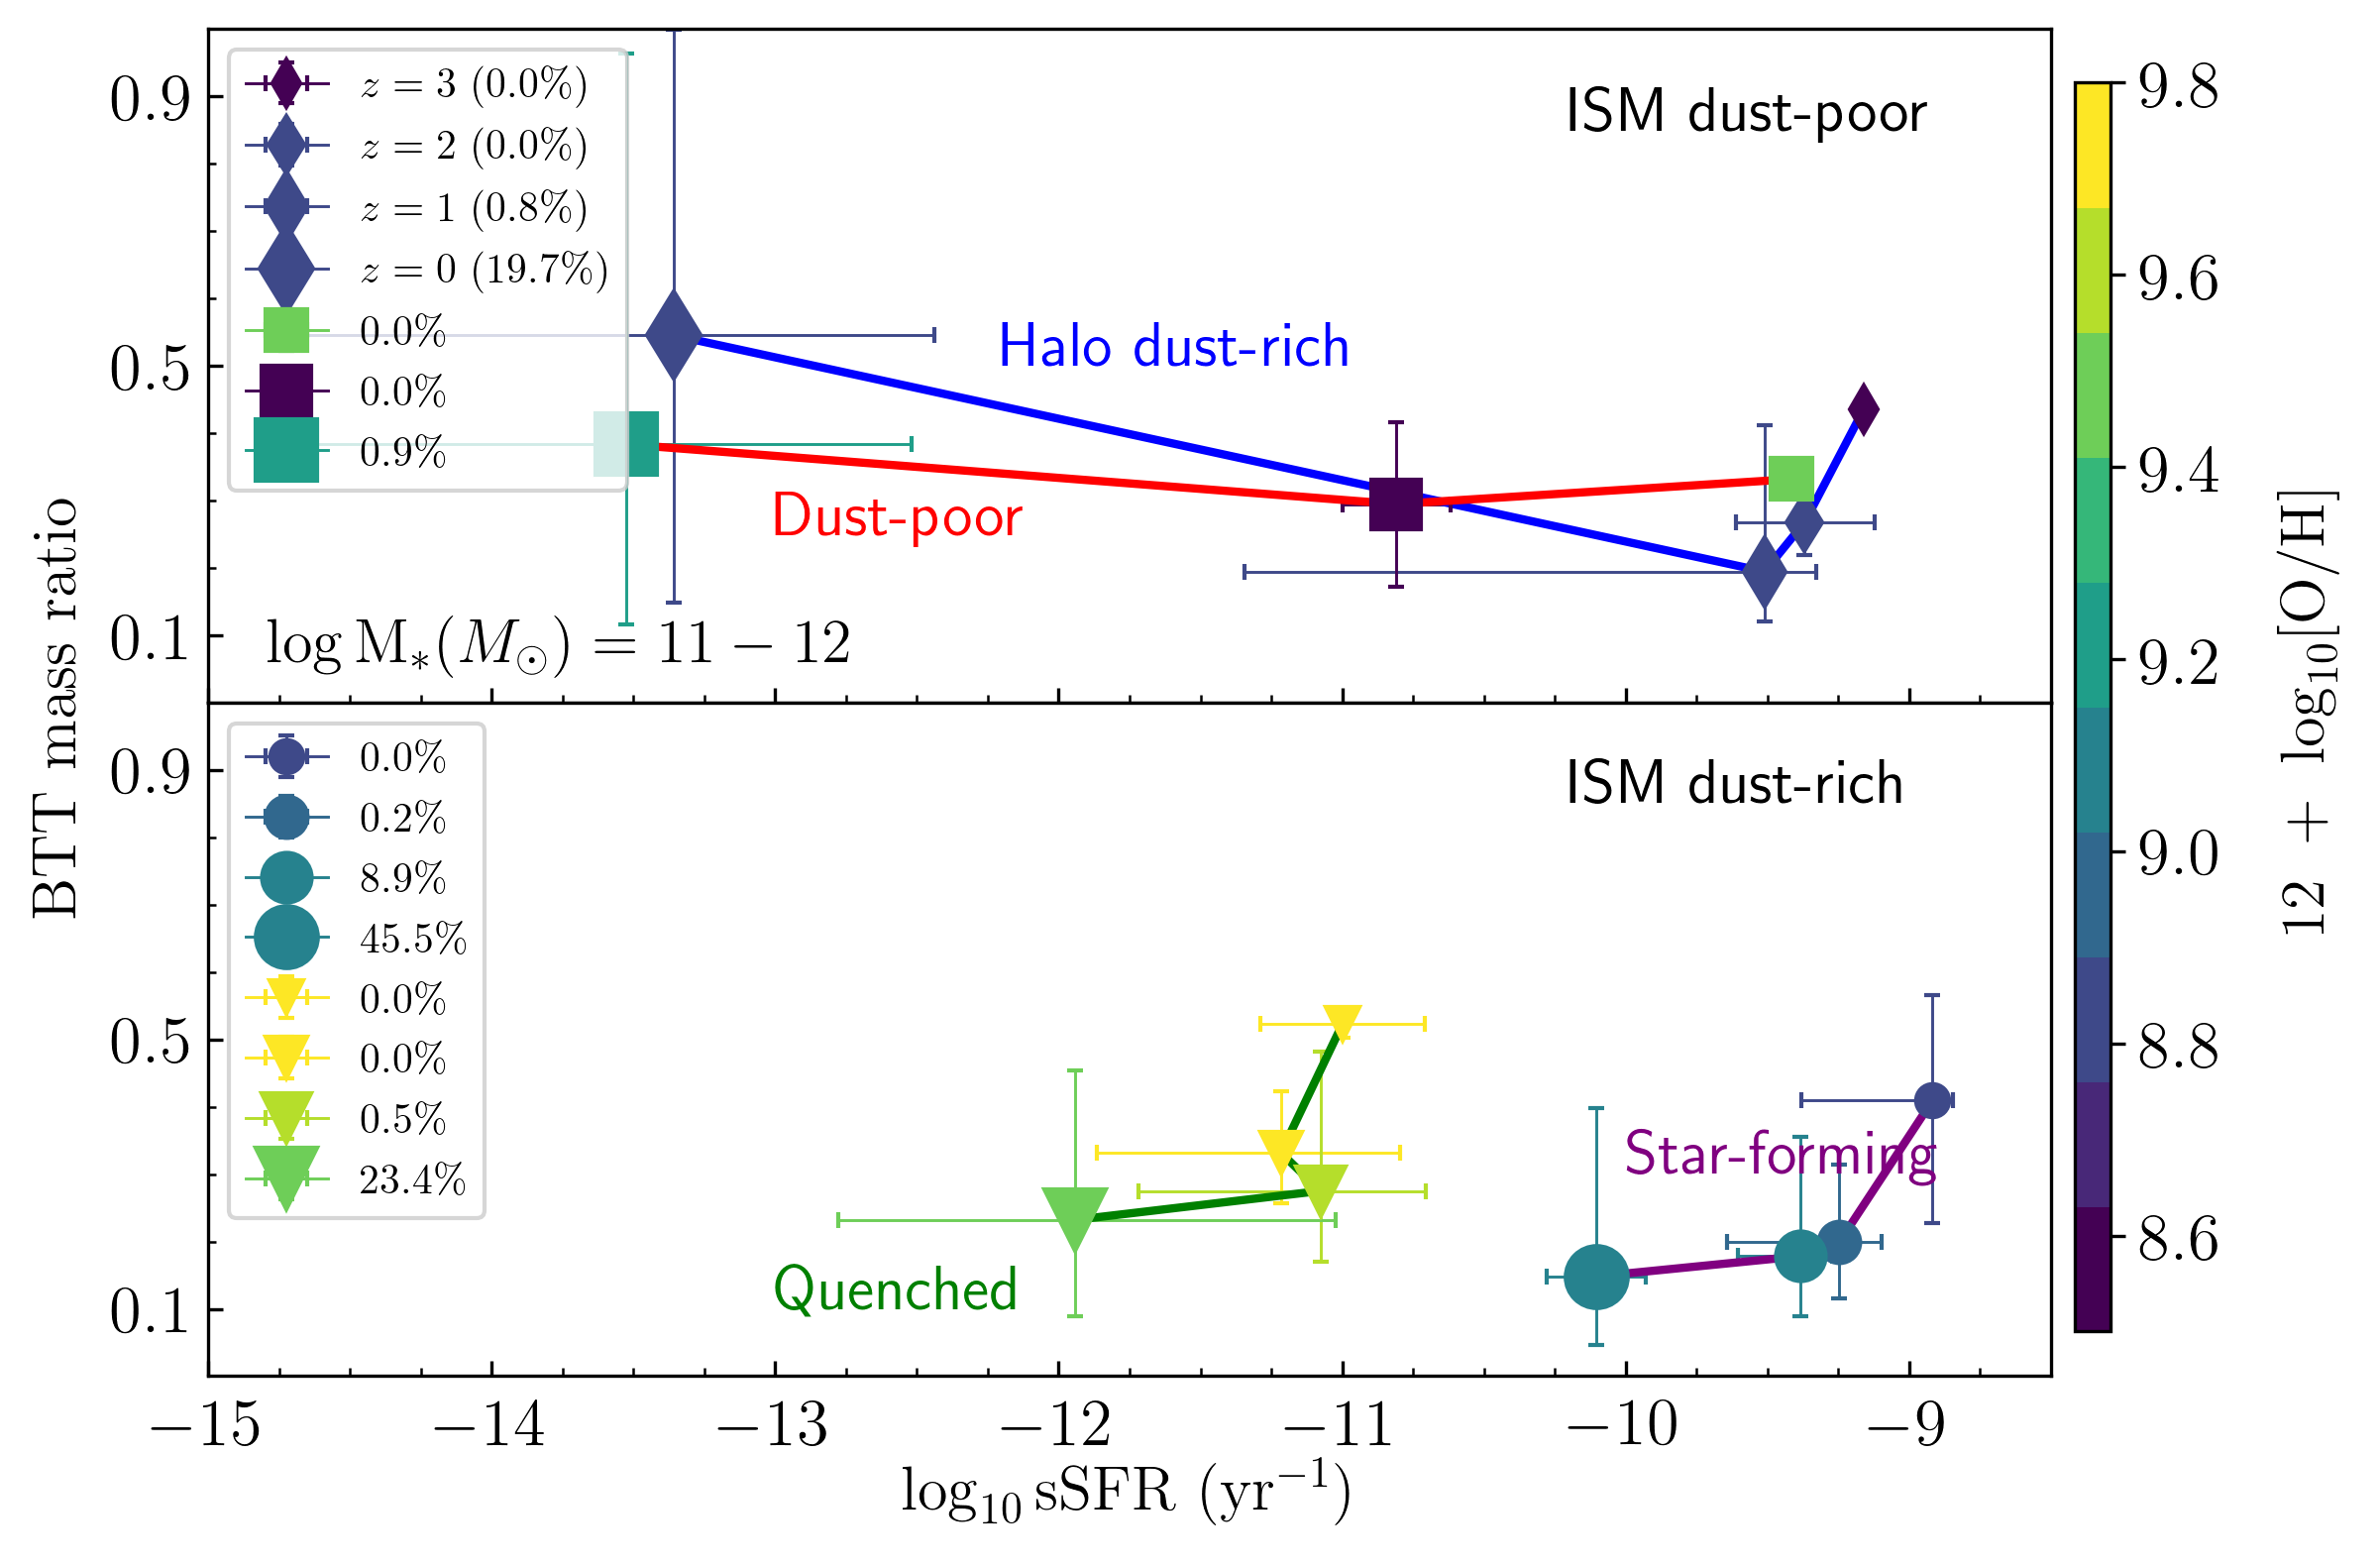

In [43]:

N=10
cm=plt.get_cmap('viridis', N)
norm=Normalize(vmin = 8.5, vmax=9.8)

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

ax = plt.subplot(211)
ax.set_xticklabels([])

yticks = [0.1, 0.5, 0.9]
xticks = [-15, -14, -13, -12, -11, -10, -9]
xlim = (-15, -8.5)
ylim = (0, 1)

marker = ['d', 's', 'o', 'v']
color = ['b', 'r', 'purple', 'g']
Ngal_z = []

compute_Ngal_z(1e11, 1e12, 0, 1e-4, -50, 10, 1e-4, 1)
compute_Ngal_z(1e11, 1e12, 0, 1e-4, -50, 10, 0, 1e-4)
compute_Ngal_z(1e11, 1e12, 1e-4, 1, ssfr_MW, 1, 0, 1)
compute_Ngal_z(1e11, 1e12, 1e-4, 1, -50, ssfr_MW, 0, 1)
tot_Ngal_z = sum(Ngal_z)

#Hot dust-rich
plot_redshift(1e11, 1e12, 0, 1e-4, -50, 10, 1e-4, 1, tot_Ngal_z, marker[0], color[0])
#Q ISM dust-rich
plot_redshift(1e11, 1e12, 0, 1e-4, -50, 10, 0, 1e-4, tot_Ngal_z, marker[1], color[1])

#plt.axvline(x=ssfr_MW, color='grey')
plt.legend(loc='upper left', fontsize=10)

plt.text(-10.2, 0.85, 'ISM dust-poor', fontsize=15)
plt.text(-12.2, 0.5, 'Halo dust-rich', color=color[0], fontsize=15)
plt.text(-13, 0.25, 'Dust-poor', color=color[1], fontsize=15)

plt.ylim(ylim)
plt.xlim(xlim)
plt.yticks(yticks)
plt.xticks(xticks)
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.25))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.tick_params(axis='x',which='both',direction='in')
ax.tick_params(axis='y',which='both',direction='in')
#===============================================================

ax = plt.subplot(212)

#SF ISM dust-rich
plot_redshift(1e11, 1e12, 1e-4, 1, ssfr_MW, 1, 0, 1, tot_Ngal_z,marker[2], color[2])
#Q ISM dust-rich
plot_redshift(1e11, 1e12, 1e-4, 1, -50, ssfr_MW, 0, 1, tot_Ngal_z,marker[3], color[3])

#plt.axvline(x=ssfr_MW, color='grey')
plt.legend(loc='upper left', fontsize=10)

plt.text(-10.2, 0.85, 'ISM dust-rich', fontsize=15)
plt.text(-10, 0.3, 'Star-forming', color=color[2],fontsize=15)
plt.text(-13, 0.1, 'Quenched', color=color[3], fontsize=15)

plt.ylim(ylim)
plt.xlim(xlim)
plt.yticks(yticks)
plt.xticks(xticks)
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.25))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.tick_params(axis='x',which='both',direction='in')
ax.tick_params(axis='y',which='both',direction='in')

plt.subplots_adjust(wspace=0, hspace=0)
plt.xlabel(r'$\log_{10} \mathrm{sSFR}\ (\mathrm{yr}^{-1})$', fontsize=15)
fig.text(0.05, 0.5, r'$\mathrm{BTT}\ \mathrm{mass}\ \mathrm{ratio}$', fontsize=15, va='center', rotation='vertical')

#added colorbar
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.91, 0.15, 0.015, 0.7])
sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])
fig.colorbar(sm, cax=cbar_ax)
fig.text(1.0, 0.5, r'$12\ +\ \log_{10}[\mathrm{O/H}]$', fontsize=15, va='center', rotation='vertical')
fig.text(0.15, 0.52, r'$\log \mathrm{M_*} (M_\odot) = 11-12$', fontsize=15)
plt.savefig('plots/btt-ssfr-Z-evol-massive-512files.png', bbox_inches='tight')

## Fig 5: cold gas - hot gas fraction

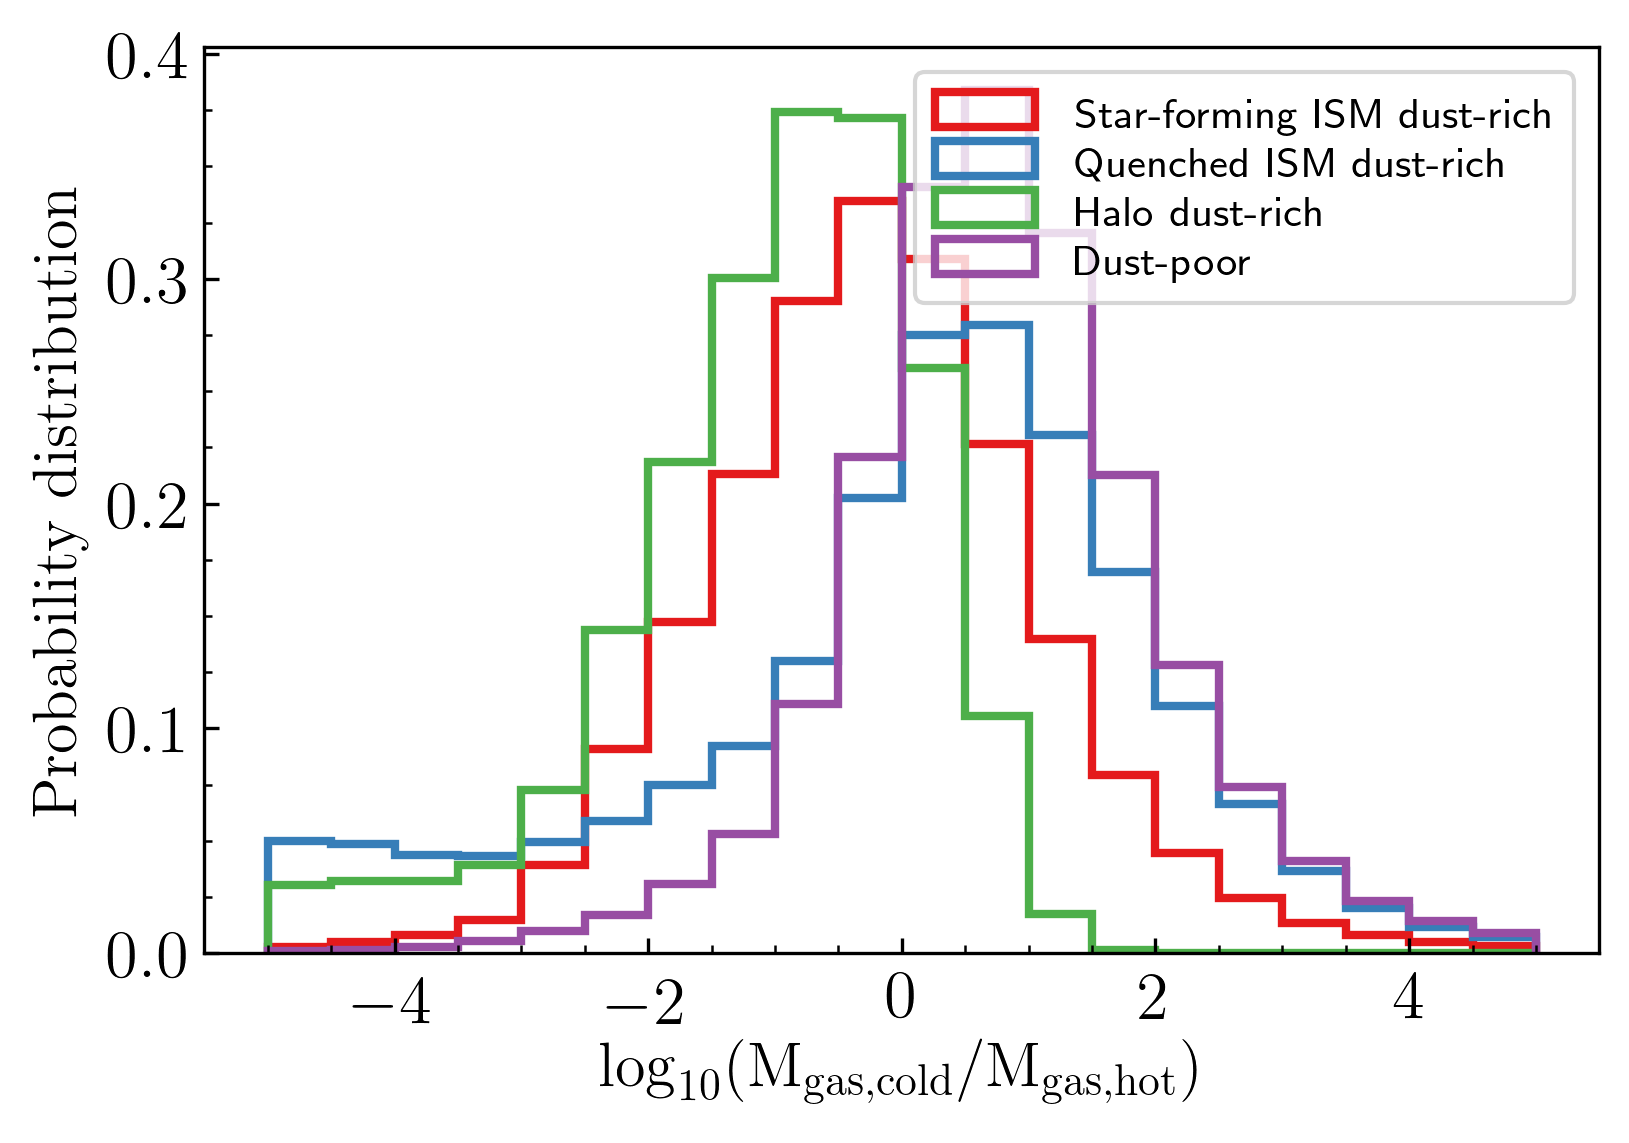

In [48]:
ax = plt.subplot(111)
#w = np.where((G_history[0].HotGas > 0) & (G_history[0].ColdGas > 0))[0]

w = np.where((G_history[0].StellarMass * 1.e10 / Hubble_h > 1.e9) & 
             (G_history[0].ColdGas * 1.e10 / Hubble_h > 1.e8) &
            (G_history[0].HotGas > 0))[0]

stellarmass = G_history[0].StellarMass[w] * 1.e10 / Hubble_h
allcolddust = G_history[0].ColdDust[w] * 1.e10 / Hubble_h
allhotdust = G_history[0].HotDust[w] * 1.e10 / Hubble_h
allsfr = np.log10(G_history[0].SfrDisk[w] + G_history[0].SfrBulge[w])
allcold = G_history[0].ColdGas[w] * 1.e10 / Hubble_h
allhot = G_history[0].HotGas[w] * 1.e10 / Hubble_h

#massive galaxies
w = np.where((stellarmass > 1e9) & (stellarmass < 1e12))[0]
colddust = allcolddust[w]/stellarmass[w]
hotdust = allhotdust[w]/stellarmass[w]
sfr = allsfr[w]
cold = allcold[w]
hot = allhot[w]
frac = np.log(cold/hot)

#SFDR
w = np.where((colddust > 1e-4) & (sfr > -1))[0]
frac_a = frac[w]

#QDR
w = np.where((colddust > 1e-4) & (sfr < -1))[0]
frac_b = frac[w]

#HDR
w = np.where((colddust > 1e-4) & (hotdust > 1e-4))[0]
frac_c = frac[w]

#DP
w = np.where((colddust > 1e-4) & (hotdust < 1e-4))[0]
frac_d = frac[w]

nbins = 20
fraction = [frac_d, frac_c, frac_b, frac_a]
labels = ['Dust-poor', 'Halo dust-rich', 'Quenched ISM dust-rich', 'Star-forming ISM dust-rich']
colors = ['#984ea3', '#4daf4a', '#377eb8','#e41a1c']
plt.hist(fraction, nbins, range=(-5,5), density=True, histtype='step',color=colors, lw=2.,label=labels)

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('small')
    
# Set the x and y axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.tick_params(axis='both',which='both',direction='in')
plt.ylabel(r'$\mathrm{Probability}\ \mathrm{distribution}$', fontsize=15)
plt.xlabel(r'$\log_{10} (\mathrm{M_{gas,cold}} / \mathrm{M_{gas,hot}})$', fontsize=15)

plt.savefig('plots/hot-cold-gas-512files.png', bbox_inches='tight')

## Fig 6: Outflow rate fraction

1.1866033
0.07216346
0.015554562
0.1068784


/apps/skylake/software/mpi/gcc/6.4.0/openmpi/3.0.0/numpy/1.16.3-python-3.6.4/lib/python3.6/site-packages/numpy-1.16.3-py3.6-linux-x86_64.egg/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


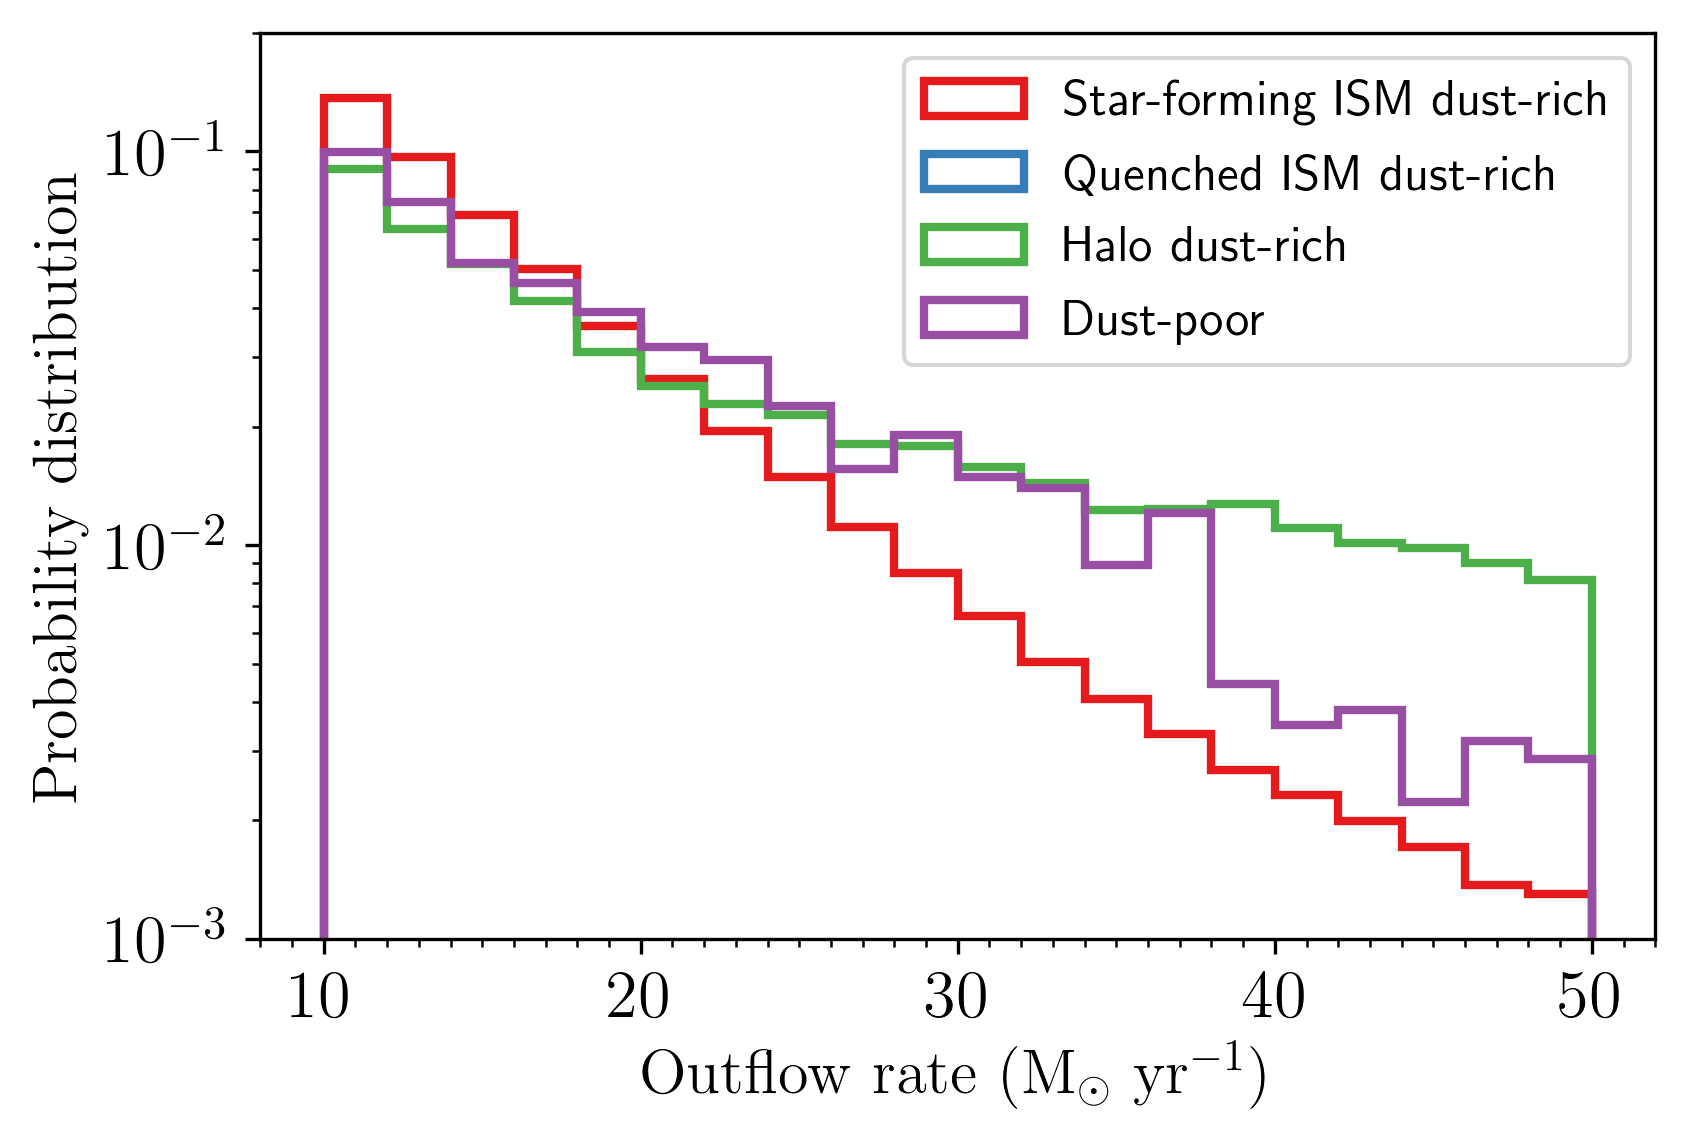

In [47]:
ax = plt.subplot(111)

w = np.where((G_history[0].StellarMass * 1.e10 / Hubble_h > 1.e9) & 
             (G_history[0].ColdGas * 1.e10 / Hubble_h > 1.e8))[0]
stellarmass = G_history[0].StellarMass[w] * 1.e10 / Hubble_h
allcolddust = G_history[0].ColdDust[w] * 1.e10 / Hubble_h
allhotdust = G_history[0].HotDust[w] * 1.e10 / Hubble_h
allsfr = np.log10(G_history[0].SfrDisk[w] + G_history[0].SfrBulge[w])
allrate = G_history[0].OutflowRate[w]

#mass
w = np.where((stellarmass > 1e9) & (stellarmass < 1e12))[0]
colddust = allcolddust[w]/stellarmass[w]
hotdust = allhotdust[w]/stellarmass[w]
sfr = allsfr[w]
rate = allrate[w]

#SFDR
w = np.where((colddust > 1e-4) & (sfr > -1))[0]
rate_a = rate[w]
print(np.median(rate_a))
#QDR
w = np.where((colddust > 1e-4) & (sfr < -1))[0]
rate_b = rate[w]
print(np.median(rate_b))

#HDR
w = np.where((colddust < 1e-4) & (hotdust > 1e-4))[0]
rate_c = rate[w]
print(np.median(rate_c))

#DP
w = np.where((colddust < 1e-4) & (hotdust < 1e-4))[0]
rate_d = rate[w]
print(np.median(rate_d))

nbins = 20
outflowrate = [rate_d, rate_c, rate_b, rate_a]
labels = ['Dust-poor', 'Halo dust-rich', 'Quenched ISM dust-rich', 'Star-forming ISM dust-rich']
colors = ['#984ea3', '#4daf4a', '#377eb8','#e41a1c']
plt.hist(outflowrate, nbins, range=(10,50), density=True, histtype='step', color=colors, lw=2, label=labels)
plt.legend(loc=0)

plt.yscale('log')
plt.ylim(1e-3, 0.2)
# Set the x and y axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
#ax.yaxis.set_minor_locator(plt.MultipleLocator(0.01))

plt.ylabel(r'$\mathrm{Probability}\ \mathrm{distribution}$', fontsize=15)
plt.xlabel(r'$\mathrm{Outflow}\ \mathrm{rate}\ (\mathrm{M_{\odot}}\ \mathrm{yr}^{-1})$', fontsize=15)

plt.savefig('plots/outflowrate-512files.png', bbox_inches='tight')